In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split

## Gaussian Regression

In [20]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel, RationalQuadratic, Matern, ExpSineSquared


In [21]:
kernel = 1*RBF(length_scale=1,length_scale_bounds=(0.1,3650)) 
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)


In [22]:
#gp.fit(x_train,y_train)

# NEW PROJECT

In [3]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [4]:
from scipy.io import arff


In [5]:
file = arff.loadarff(open('seismic-bumps.arff'))

In [6]:
f = pd.DataFrame(file[0])

In [7]:
f.head()

,seismic,seismoacoustic,shift,genergy,gpuls,gdenergy,gdpuls,ghazard,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,nbumps6,nbumps7,nbumps89,energy,maxenergy,class
0,b'a',b'a',b'N',15180.0,48.0,-72.0,-72.0,b'a',0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'0'
1,b'a',b'a',b'N',14720.0,33.0,-70.0,-79.0,b'a',1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2000.0,2000.0,b'0'
2,b'a',b'a',b'N',8050.0,30.0,-81.0,-78.0,b'a',0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'0'
3,b'a',b'a',b'N',28820.0,171.0,-23.0,40.0,b'a',1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3000.0,3000.0,b'0'
4,b'a',b'a',b'N',12640.0,57.0,-63.0,-52.0,b'a',0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'0'


In [8]:
f['seismic'] = le.fit_transform(f['seismic'])

In [9]:
f['seismoacoustic'] = le.fit_transform(f['seismoacoustic'])

In [10]:
f['shift'] = le.fit_transform(f['shift'])

In [11]:
f['class'] = le.fit_transform(f['class'])

In [12]:
f['ghazard'] = le.fit_transform(f['ghazard'])

In [33]:
f.columns

Index(['seismic', 'seismoacoustic', 'shift', 'genergy', 'gpuls', 'gdenergy',
       'gdpuls', 'ghazard', 'nbumps', 'nbumps2', 'nbumps3', 'nbumps4',
       'nbumps5', 'nbumps6', 'nbumps7', 'nbumps89', 'energy', 'maxenergy',
       'class'],
      dtype='object')

In [13]:
X = f.iloc[:,0:18]
Y = f.iloc[:, -1]
Xt, xt, Yt, yt = train_test_split(X,Y,test_size=0.20,random_state=30)
print(Xt.shape, xt.shape, Yt.shape, yt.shape)

(2067, 18) (517, 18) (2067,) (517,)


In [14]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=15, step=5, verbose=5)
rfe_selector.fit(Xt, Yt)
rfe_support = rfe_selector.get_support()
rfe_feature = Xt.loc[:,rfe_support].columns.tolist()
print(rfe_feature)

Fitting estimator with 18 features.
['seismic', 'seismoacoustic', 'shift', 'genergy', 'gpuls', 'gdenergy', 'gdpuls', 'ghazard', 'nbumps', 'nbumps2', 'nbumps3', 'nbumps4', 'nbumps5', 'energy', 'maxenergy']


C:\Users\HP RYZEN 3\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP RYZEN 3\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [36]:
rfe_selector.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False, False,  True,  True])

In [39]:
rfe_selector.ranking_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1])

In [15]:
newdata = f.drop(['nbumps6','nbumps7','nbumps89'], axis=1)

In [16]:
newdata.columns

Index(['seismic', 'seismoacoustic', 'shift', 'genergy', 'gpuls', 'gdenergy',
       'gdpuls', 'ghazard', 'nbumps', 'nbumps2', 'nbumps3', 'nbumps4',
       'nbumps5', 'energy', 'maxenergy', 'class'],
      dtype='object')

In [17]:
newX = newdata.iloc[:,0:16]
newY = newdata.iloc[:, -1]
Xt, xt, Yt, yt = train_test_split(newX,newY,test_size=0.25,random_state=30)
print(Xt.shape, xt.shape, Yt.shape, yt.shape)

(1938, 16) (646, 16) (1938,) (646,)


In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [19]:
dtc = DecisionTreeClassifier(class_weight='balanced',criterion='gini', max_leaf_nodes=10, max_depth=4, max_features=4, min_samples_leaf=70,random_state=40)
dtc.fit(Xt,Yt)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=4,
                       max_features=4, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=70, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=40, splitter='best')

In [20]:
print(dtc.score(Xt,Yt))
print(dtc.score(xt,yt))

0.7868937048503611
0.7786377708978328


In [21]:
from sklearn.metrics import roc_auc_score

In [22]:
from sklearn.model_selection import cross_val_score
from mlxtend.plotting import plot_learning_curves
from mlxtend.plotting import plot_decision_regions

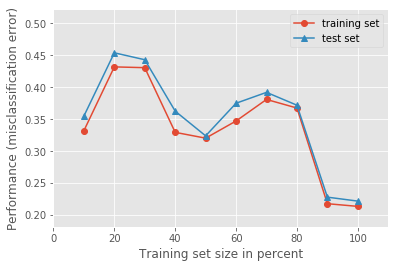

In [48]:
plt.figure()
plot_learning_curves(Xt, Yt, xt, yt, dtc, print_model=False, style='ggplot')
plt.show()

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier

## Random Forests in Ensemble Learning

In [24]:
from sklearn import model_selection

In [25]:
kf = model_selection.KFold(n_splits=10, random_state=10)

In [26]:
rfc = RandomForestClassifier(class_weight='balanced',n_estimators = 10, criterion='entropy', max_depth=3, max_features = 4, max_leaf_nodes = 15, min_samples_leaf=50)

In [27]:
rfc.fit(Xt, Yt)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='entropy', max_depth=3, max_features=4,
                       max_leaf_nodes=15, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=50,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=10, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [28]:
rfc.score(Xt, Yt)

0.9865841073271414

In [29]:
rfc.score(xt,yt)

0.9876160990712074

In [30]:
results = model_selection.cross_val_score(rfc, Xt, Yt, cv=kf)
print(results.mean())

0.8777736232038886


In [31]:
results

array([0.96391753, 0.89175258, 0.83505155, 0.82989691, 0.78865979,
       0.88659794, 0.85051546, 0.85051546, 0.93264249, 0.94818653])

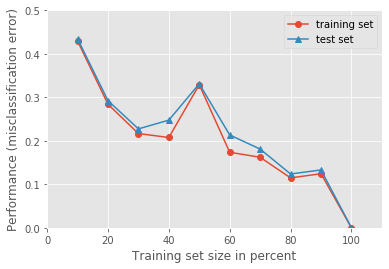

In [37]:
plt.figure()
plot_learning_curves(Xt, Yt, xt, yt, rfc, print_model=False, style='ggplot')
plt.show()

## Extra Trees

In [38]:
from sklearn.ensemble import ExtraTreesClassifier

In [131]:
etc = ExtraTreesClassifier(class_weight='balanced',criterion='entropy',n_estimators=10, max_features=4, max_depth=8,max_leaf_nodes=10, min_samples_leaf=50)
results = model_selection.cross_val_score(etc, Xt, Yt, cv=kf)

In [40]:
print(results)

[1.         1.         0.99484536 1.         1.         0.99484536
 0.95876289 1.         0.97927461 0.95336788]


In [132]:
etc.fit(Xt, Yt)

ExtraTreesClassifier(bootstrap=False, class_weight='balanced',
                     criterion='entropy', max_depth=8, max_features=4,
                     max_leaf_nodes=10, min_impurity_decrease=0.0,
                     min_impurity_split=None, min_samples_leaf=50,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=10, n_jobs=None, oob_score=False,
                     random_state=None, verbose=0, warm_start=False)

In [133]:
etc.score(Xt,Yt)

0.936016511867905

In [134]:
etc.score(xt,yt)

0.9365325077399381

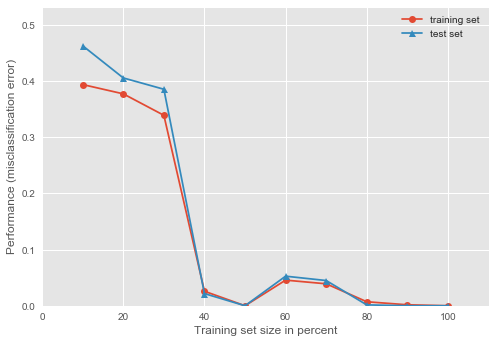

In [135]:
plt.figure()
plot_learning_curves(Xt, Yt, xt, yt, etc, print_model=False, style='ggplot')
plt.show()

## Bagging classifiers

In [45]:
bc = BaggingClassifier(base_estimator=dtc, n_estimators=10, random_state=10)

In [46]:
results = model_selection.cross_val_score(bc,Xt,Yt,cv=kf)

In [47]:
results.mean()

0.7713450136210672

In [48]:
bc.fit(Xt,Yt)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                        criterion='gini',
                                                        max_depth=4,
                                                        max_features=4,
                                                        max_leaf_nodes=10,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=70,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=40,
                                                        splitter='best'),
       

In [49]:
bc.score(Xt, Yt)

0.7456140350877193

In [50]:
bc.score(xt,yt)

0.7430340557275542

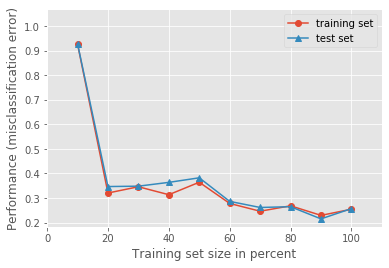

In [51]:
plt.figure()
plot_learning_curves(Xt, Yt, xt, yt,bc, print_model=False, style='ggplot')
plt.show()

## VOTING TECHNIQUES

The max voting method is generally used for classification problems. In this technique, multiple models are used to make predictions for each data point. The predictions by each model are considered as a ‘vote’. The predictions which we get from the majority of the models are used as the final prediction.

For example, when you asked 5 of your colleagues to rate your movie (out of 5); we’ll assume three of them rated it as 4 while two of them gave it a 5. Since the majority gave a rating of 4, the final rating will be taken as 4. You can consider this as taking the mode of all the predictions.

In [52]:
from sklearn.ensemble import VotingClassifier

In [53]:
vc = VotingClassifier(estimators=[('DT', dtc), ('RF', rfc)], voting='hard')

In [58]:
vc.fit(Xt, Yt)

VotingClassifier(estimators=[('DT',
                              DecisionTreeClassifier(class_weight='balanced',
                                                     criterion='gini',
                                                     max_depth=4,
                                                     max_features=4,
                                                     max_leaf_nodes=10,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=70,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     presort=False,
                                                     random_state=40,
                                                     splitter='best')),
         

In [59]:
vc.score(Xt, Yt)

0.978328173374613

In [60]:
vc.score(xt , yt)

0.9814241486068112

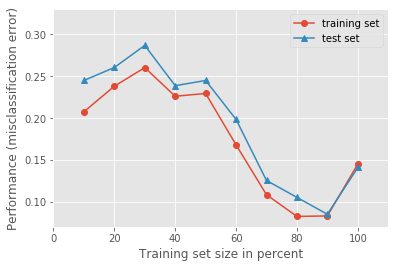

In [78]:
plt.figure()
plot_learning_curves(Xt, Yt, xt, yt, vc, print_model= False, style='ggplot')
plt.show()

## STACKING

In [79]:
from mlxtend.classifier import StackingCVClassifier

In [80]:
sclf = StackingCVClassifier(classifiers=[dtc, rfc, etc], 
                          meta_classifier = vc)

plt.figure()
plot_learning_curves(Xt, Yt, xt, yt, sclf, print_model= False, style='ggplot')
plt.show()

In [61]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier

In [62]:
abc = AdaBoostClassifier(base_estimator=dtc, n_estimators=50,learning_rate=0.0025, random_state=40)
abc.fit(Xt, Yt)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                         criterion='gini',
                                                         max_depth=4,
                                                         max_features=4,
                                                         max_leaf_nodes=10,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=70,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=40,
                             

In [63]:
abc.score(Xt, Yt)

1.0

In [64]:
abc.score(xt,yt)

1.0

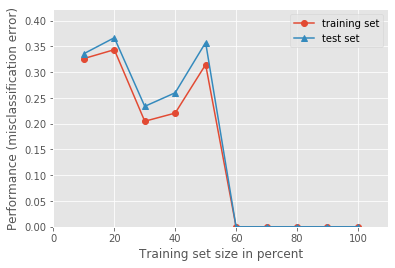

In [65]:
plt.figure()
plot_learning_curves(Xt, Yt, xt, yt,abc, print_model = False, style='ggplot')
plt.show()

In [66]:
gbc = GradientBoostingClassifier(max_depth=4, max_features=4, min_samples_leaf=70, random_state=10,warm_start= True )

In [67]:
gbc.fit(Xt, Yt)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=4,
                           max_features=4, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=70, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=10, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0, warm_start=True)

In [68]:
gbc.score(Xt, Yt)

1.0

In [69]:
gbc.score(xt,yt)

1.0

C:\Users\HP RYZEN 3\Anaconda3\lib\site-packages\mlxtend\plotting\learning_curves.py:132: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  plt.ylim([min_y - min_y * 0.15, max_y + max_y * 0.15])


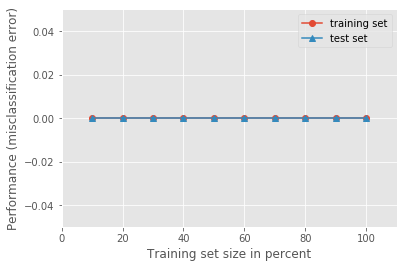

In [70]:
plt.figure()
plot_learning_curves(Xt, Yt, xt, yt, gbc, print_model=False, style='ggplot')
plt.show()

In [71]:
xgbc = xgb.XGBClassifier(subsample = 0.5, reg_alpha=10, max_depth=4, reg_lambda=10, random_state=20,learning_rate=0.001)
xgbc.fit(Xt, Yt)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.001, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=20,
              reg_alpha=10, reg_lambda=10, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.5, verbosity=1)

In [72]:
xgbc.score(Xt, Yt)

1.0

In [73]:
xgbc.score(xt,yt)

1.0

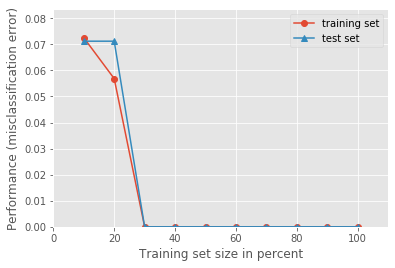

In [74]:
plt.figure()
plot_learning_curves(Xt, Yt, xt, yt, xgbc, print_model=False, style='ggplot')
plt.show()

In [94]:
cbc=CatBoostClassifier(learning_rate=0.03, depth=8, l2_leaf_reg=5, one_hot_max_size=50)
cbc.fit(Xt, Yt,eval_set=(xt, yt))

0:	learn: 0.6153029	test: 0.6153904	best: 0.6153904 (0)	total: 89.7ms	remaining: 1m 29s
1:	learn: 0.5308019	test: 0.5306203	best: 0.5306203 (1)	total: 95.6ms	remaining: 47.7s
2:	learn: 0.4658736	test: 0.4656604	best: 0.4656604 (2)	total: 109ms	remaining: 36.3s
3:	learn: 0.4062723	test: 0.4064233	best: 0.4064233 (3)	total: 126ms	remaining: 31.3s
4:	learn: 0.3503733	test: 0.3506911	best: 0.3506911 (4)	total: 129ms	remaining: 25.6s
5:	learn: 0.3012477	test: 0.3016597	best: 0.3016597 (5)	total: 135ms	remaining: 22.4s
6:	learn: 0.2707976	test: 0.2711801	best: 0.2711801 (6)	total: 150ms	remaining: 21.2s
7:	learn: 0.2444362	test: 0.2447058	best: 0.2447058 (7)	total: 162ms	remaining: 20.1s
8:	learn: 0.2158213	test: 0.2159887	best: 0.2159887 (8)	total: 172ms	remaining: 18.9s
9:	learn: 0.1885681	test: 0.1887504	best: 0.1887504 (9)	total: 176ms	remaining: 17.4s
10:	learn: 0.1634834	test: 0.1637298	best: 0.1637298 (10)	total: 179ms	remaining: 16.1s
11:	learn: 0.1437431	test: 0.1440994	best: 0.1440

100:	learn: 0.0020808	test: 0.0024353	best: 0.0024353 (100)	total: 1.15s	remaining: 10.2s
101:	learn: 0.0020171	test: 0.0023658	best: 0.0023658 (101)	total: 1.15s	remaining: 10.1s
102:	learn: 0.0019840	test: 0.0023288	best: 0.0023288 (102)	total: 1.15s	remaining: 10.1s
103:	learn: 0.0019414	test: 0.0022844	best: 0.0022844 (103)	total: 1.16s	remaining: 10s
104:	learn: 0.0019171	test: 0.0022588	best: 0.0022588 (104)	total: 1.17s	remaining: 9.97s
105:	learn: 0.0018787	test: 0.0022146	best: 0.0022146 (105)	total: 1.17s	remaining: 9.9s
106:	learn: 0.0018358	test: 0.0021669	best: 0.0021669 (106)	total: 1.18s	remaining: 9.88s
107:	learn: 0.0018116	test: 0.0021401	best: 0.0021401 (107)	total: 1.19s	remaining: 9.85s
108:	learn: 0.0017687	test: 0.0020935	best: 0.0020935 (108)	total: 1.2s	remaining: 9.8s
109:	learn: 0.0017316	test: 0.0020538	best: 0.0020538 (109)	total: 1.2s	remaining: 9.73s
110:	learn: 0.0017113	test: 0.0020301	best: 0.0020301 (110)	total: 1.21s	remaining: 9.68s
111:	learn: 0.00

201:	learn: 0.0006511	test: 0.0008253	best: 0.0008253 (201)	total: 1.97s	remaining: 7.78s
202:	learn: 0.0006458	test: 0.0008185	best: 0.0008185 (202)	total: 1.98s	remaining: 7.76s
203:	learn: 0.0006384	test: 0.0008101	best: 0.0008101 (203)	total: 1.98s	remaining: 7.73s
204:	learn: 0.0006306	test: 0.0008000	best: 0.0008000 (204)	total: 1.98s	remaining: 7.7s
205:	learn: 0.0006284	test: 0.0007974	best: 0.0007974 (205)	total: 1.99s	remaining: 7.69s
206:	learn: 0.0006244	test: 0.0007923	best: 0.0007923 (206)	total: 2s	remaining: 7.68s
207:	learn: 0.0006180	test: 0.0007840	best: 0.0007840 (207)	total: 2.01s	remaining: 7.65s
208:	learn: 0.0006144	test: 0.0007797	best: 0.0007797 (208)	total: 2.02s	remaining: 7.64s
209:	learn: 0.0006101	test: 0.0007739	best: 0.0007739 (209)	total: 2.03s	remaining: 7.63s
210:	learn: 0.0006075	test: 0.0007703	best: 0.0007703 (210)	total: 2.04s	remaining: 7.63s
211:	learn: 0.0006035	test: 0.0007659	best: 0.0007659 (211)	total: 2.04s	remaining: 7.6s
212:	learn: 0.0

309:	learn: 0.0003683	test: 0.0004768	best: 0.0004768 (309)	total: 2.98s	remaining: 6.64s
310:	learn: 0.0003670	test: 0.0004753	best: 0.0004753 (310)	total: 2.99s	remaining: 6.63s
311:	learn: 0.0003657	test: 0.0004736	best: 0.0004736 (311)	total: 3s	remaining: 6.62s
312:	learn: 0.0003644	test: 0.0004722	best: 0.0004722 (312)	total: 3.01s	remaining: 6.61s
313:	learn: 0.0003629	test: 0.0004704	best: 0.0004704 (313)	total: 3.02s	remaining: 6.6s
314:	learn: 0.0003614	test: 0.0004684	best: 0.0004684 (314)	total: 3.03s	remaining: 6.58s
315:	learn: 0.0003601	test: 0.0004668	best: 0.0004668 (315)	total: 3.04s	remaining: 6.57s
316:	learn: 0.0003588	test: 0.0004654	best: 0.0004654 (316)	total: 3.04s	remaining: 6.56s
317:	learn: 0.0003576	test: 0.0004638	best: 0.0004638 (317)	total: 3.05s	remaining: 6.55s
318:	learn: 0.0003561	test: 0.0004621	best: 0.0004621 (318)	total: 3.06s	remaining: 6.54s
319:	learn: 0.0003546	test: 0.0004599	best: 0.0004599 (319)	total: 3.07s	remaining: 6.52s
320:	learn: 0.

403:	learn: 0.0002756	test: 0.0003646	best: 0.0003646 (403)	total: 4.01s	remaining: 5.91s
404:	learn: 0.0002749	test: 0.0003637	best: 0.0003637 (404)	total: 4.02s	remaining: 5.9s
405:	learn: 0.0002741	test: 0.0003628	best: 0.0003628 (405)	total: 4.03s	remaining: 5.89s
406:	learn: 0.0002734	test: 0.0003620	best: 0.0003620 (406)	total: 4.04s	remaining: 5.88s
407:	learn: 0.0002727	test: 0.0003611	best: 0.0003611 (407)	total: 4.05s	remaining: 5.87s
408:	learn: 0.0002720	test: 0.0003603	best: 0.0003603 (408)	total: 4.06s	remaining: 5.86s
409:	learn: 0.0002713	test: 0.0003595	best: 0.0003595 (409)	total: 4.07s	remaining: 5.85s
410:	learn: 0.0002706	test: 0.0003587	best: 0.0003587 (410)	total: 4.08s	remaining: 5.84s
411:	learn: 0.0002699	test: 0.0003579	best: 0.0003579 (411)	total: 4.09s	remaining: 5.83s
412:	learn: 0.0002692	test: 0.0003571	best: 0.0003571 (412)	total: 4.1s	remaining: 5.82s
413:	learn: 0.0002685	test: 0.0003562	best: 0.0003562 (413)	total: 4.11s	remaining: 5.81s
414:	learn: 

496:	learn: 0.0002218	test: 0.0003019	best: 0.0003019 (496)	total: 5.03s	remaining: 5.09s
497:	learn: 0.0002213	test: 0.0003014	best: 0.0003014 (497)	total: 5.04s	remaining: 5.08s
498:	learn: 0.0002209	test: 0.0003009	best: 0.0003009 (498)	total: 5.05s	remaining: 5.07s
499:	learn: 0.0002204	test: 0.0003003	best: 0.0003003 (499)	total: 5.06s	remaining: 5.06s
500:	learn: 0.0002200	test: 0.0002998	best: 0.0002998 (500)	total: 5.07s	remaining: 5.05s
501:	learn: 0.0002195	test: 0.0002993	best: 0.0002993 (501)	total: 5.08s	remaining: 5.04s
502:	learn: 0.0002191	test: 0.0002988	best: 0.0002988 (502)	total: 5.09s	remaining: 5.03s
503:	learn: 0.0002186	test: 0.0002983	best: 0.0002983 (503)	total: 5.1s	remaining: 5.02s
504:	learn: 0.0002182	test: 0.0002978	best: 0.0002978 (504)	total: 5.11s	remaining: 5.01s
505:	learn: 0.0002178	test: 0.0002973	best: 0.0002973 (505)	total: 5.12s	remaining: 5s
506:	learn: 0.0002173	test: 0.0002968	best: 0.0002968 (506)	total: 5.13s	remaining: 4.99s
507:	learn: 0.

588:	learn: 0.0001888	test: 0.0002642	best: 0.0002642 (588)	total: 6.03s	remaining: 4.21s
589:	learn: 0.0001885	test: 0.0002639	best: 0.0002639 (589)	total: 6.04s	remaining: 4.2s
590:	learn: 0.0001882	test: 0.0002635	best: 0.0002635 (590)	total: 6.05s	remaining: 4.19s
591:	learn: 0.0001879	test: 0.0002632	best: 0.0002632 (591)	total: 6.06s	remaining: 4.18s
592:	learn: 0.0001876	test: 0.0002629	best: 0.0002629 (592)	total: 6.07s	remaining: 4.17s
593:	learn: 0.0001874	test: 0.0002626	best: 0.0002626 (593)	total: 6.08s	remaining: 4.16s
594:	learn: 0.0001871	test: 0.0002623	best: 0.0002623 (594)	total: 6.09s	remaining: 4.15s
595:	learn: 0.0001868	test: 0.0002620	best: 0.0002620 (595)	total: 6.1s	remaining: 4.14s
596:	learn: 0.0001865	test: 0.0002617	best: 0.0002617 (596)	total: 6.11s	remaining: 4.13s
597:	learn: 0.0001863	test: 0.0002613	best: 0.0002613 (597)	total: 6.12s	remaining: 4.12s
598:	learn: 0.0001860	test: 0.0002610	best: 0.0002610 (598)	total: 6.13s	remaining: 4.11s
599:	learn: 

681:	learn: 0.0001637	test: 0.0002357	best: 0.0002357 (681)	total: 7.05s	remaining: 3.29s
682:	learn: 0.0001635	test: 0.0002355	best: 0.0002355 (682)	total: 7.06s	remaining: 3.28s
683:	learn: 0.0001633	test: 0.0002352	best: 0.0002352 (683)	total: 7.07s	remaining: 3.27s
684:	learn: 0.0001630	test: 0.0002350	best: 0.0002350 (684)	total: 7.09s	remaining: 3.26s
685:	learn: 0.0001628	test: 0.0002347	best: 0.0002347 (685)	total: 7.1s	remaining: 3.25s
686:	learn: 0.0001626	test: 0.0002345	best: 0.0002345 (686)	total: 7.11s	remaining: 3.24s
687:	learn: 0.0001623	test: 0.0002342	best: 0.0002342 (687)	total: 7.12s	remaining: 3.23s
688:	learn: 0.0001621	test: 0.0002340	best: 0.0002340 (688)	total: 7.13s	remaining: 3.22s
689:	learn: 0.0001619	test: 0.0002337	best: 0.0002337 (689)	total: 7.14s	remaining: 3.21s
690:	learn: 0.0001617	test: 0.0002335	best: 0.0002335 (690)	total: 7.15s	remaining: 3.2s
691:	learn: 0.0001614	test: 0.0002332	best: 0.0002332 (691)	total: 7.16s	remaining: 3.19s
692:	learn: 

787:	learn: 0.0001424	test: 0.0002123	best: 0.0002123 (787)	total: 8.2s	remaining: 2.21s
788:	learn: 0.0001422	test: 0.0002122	best: 0.0002122 (788)	total: 8.21s	remaining: 2.19s
789:	learn: 0.0001420	test: 0.0002120	best: 0.0002120 (789)	total: 8.22s	remaining: 2.19s
790:	learn: 0.0001419	test: 0.0002118	best: 0.0002118 (790)	total: 8.23s	remaining: 2.17s
791:	learn: 0.0001417	test: 0.0002116	best: 0.0002116 (791)	total: 8.24s	remaining: 2.16s
792:	learn: 0.0001415	test: 0.0002114	best: 0.0002114 (792)	total: 8.25s	remaining: 2.15s
793:	learn: 0.0001414	test: 0.0002112	best: 0.0002112 (793)	total: 8.26s	remaining: 2.14s
794:	learn: 0.0001412	test: 0.0002111	best: 0.0002111 (794)	total: 8.27s	remaining: 2.13s
795:	learn: 0.0001410	test: 0.0002109	best: 0.0002109 (795)	total: 8.28s	remaining: 2.12s
796:	learn: 0.0001409	test: 0.0002107	best: 0.0002107 (796)	total: 8.29s	remaining: 2.11s
797:	learn: 0.0001407	test: 0.0002105	best: 0.0002105 (797)	total: 8.31s	remaining: 2.1s
798:	learn: 

882:	learn: 0.0001280	test: 0.0001970	best: 0.0001970 (882)	total: 9.22s	remaining: 1.22s
883:	learn: 0.0001278	test: 0.0001968	best: 0.0001968 (883)	total: 9.23s	remaining: 1.21s
884:	learn: 0.0001277	test: 0.0001967	best: 0.0001967 (884)	total: 9.24s	remaining: 1.2s
885:	learn: 0.0001276	test: 0.0001965	best: 0.0001965 (885)	total: 9.26s	remaining: 1.19s
886:	learn: 0.0001274	test: 0.0001964	best: 0.0001964 (886)	total: 9.27s	remaining: 1.18s
887:	learn: 0.0001273	test: 0.0001963	best: 0.0001963 (887)	total: 9.28s	remaining: 1.17s
888:	learn: 0.0001271	test: 0.0001961	best: 0.0001961 (888)	total: 9.29s	remaining: 1.16s
889:	learn: 0.0001270	test: 0.0001960	best: 0.0001960 (889)	total: 9.3s	remaining: 1.15s
890:	learn: 0.0001269	test: 0.0001958	best: 0.0001958 (890)	total: 9.31s	remaining: 1.14s
891:	learn: 0.0001268	test: 0.0001957	best: 0.0001957 (891)	total: 9.32s	remaining: 1.13s
892:	learn: 0.0001266	test: 0.0001956	best: 0.0001956 (892)	total: 9.33s	remaining: 1.12s
893:	learn: 

985:	learn: 0.0001155	test: 0.0001839	best: 0.0001839 (985)	total: 10.2s	remaining: 145ms
986:	learn: 0.0001154	test: 0.0001838	best: 0.0001838 (986)	total: 10.3s	remaining: 135ms
987:	learn: 0.0001153	test: 0.0001837	best: 0.0001837 (987)	total: 10.3s	remaining: 125ms
988:	learn: 0.0001152	test: 0.0001836	best: 0.0001836 (988)	total: 10.3s	remaining: 114ms
989:	learn: 0.0001151	test: 0.0001835	best: 0.0001835 (989)	total: 10.3s	remaining: 104ms
990:	learn: 0.0001150	test: 0.0001834	best: 0.0001834 (990)	total: 10.3s	remaining: 93.4ms
991:	learn: 0.0001149	test: 0.0001833	best: 0.0001833 (991)	total: 10.3s	remaining: 83ms
992:	learn: 0.0001148	test: 0.0001832	best: 0.0001832 (992)	total: 10.3s	remaining: 72.6ms
993:	learn: 0.0001147	test: 0.0001831	best: 0.0001831 (993)	total: 10.3s	remaining: 62.3ms
994:	learn: 0.0001146	test: 0.0001829	best: 0.0001829 (994)	total: 10.3s	remaining: 51.9ms
995:	learn: 0.0001145	test: 0.0001828	best: 0.0001828 (995)	total: 10.3s	remaining: 41.5ms
996:	l

In [95]:
cbc.score(Xt, Yt)

1.0

In [96]:
cbc.score(xt,yt)

1.0

0:	learn: 0.6368311	total: 7.27ms	remaining: 7.26s
1:	learn: 0.5908330	total: 11ms	remaining: 5.49s
2:	learn: 0.5411755	total: 13.9ms	remaining: 4.63s
3:	learn: 0.5117887	total: 19.4ms	remaining: 4.83s
4:	learn: 0.4623479	total: 21.3ms	remaining: 4.25s
5:	learn: 0.4277327	total: 29.4ms	remaining: 4.87s
6:	learn: 0.3895176	total: 31.7ms	remaining: 4.49s
7:	learn: 0.3531325	total: 34.1ms	remaining: 4.23s
8:	learn: 0.3198238	total: 35.7ms	remaining: 3.93s
9:	learn: 0.3032819	total: 40.8ms	remaining: 4.04s
10:	learn: 0.2839293	total: 45ms	remaining: 4.05s
11:	learn: 0.2618895	total: 46.4ms	remaining: 3.82s
12:	learn: 0.2491652	total: 51ms	remaining: 3.87s
13:	learn: 0.2299617	total: 54ms	remaining: 3.8s
14:	learn: 0.2070381	total: 54.8ms	remaining: 3.6s
15:	learn: 0.1932326	total: 56.7ms	remaining: 3.49s
16:	learn: 0.1812205	total: 61ms	remaining: 3.53s
17:	learn: 0.1668516	total: 62.2ms	remaining: 3.39s
18:	learn: 0.1515779	total: 63.7ms	remaining: 3.29s
19:	learn: 0.1473794	total: 68ms	r

163:	learn: 0.0066291	total: 615ms	remaining: 3.14s
164:	learn: 0.0065658	total: 619ms	remaining: 3.13s
165:	learn: 0.0064763	total: 623ms	remaining: 3.13s
166:	learn: 0.0064317	total: 629ms	remaining: 3.14s
167:	learn: 0.0064035	total: 635ms	remaining: 3.15s
168:	learn: 0.0063723	total: 640ms	remaining: 3.15s
169:	learn: 0.0063433	total: 645ms	remaining: 3.15s
170:	learn: 0.0062503	total: 649ms	remaining: 3.14s
171:	learn: 0.0061983	total: 653ms	remaining: 3.14s
172:	learn: 0.0061693	total: 660ms	remaining: 3.16s
173:	learn: 0.0060629	total: 662ms	remaining: 3.14s
174:	learn: 0.0060064	total: 664ms	remaining: 3.13s
175:	learn: 0.0059682	total: 669ms	remaining: 3.13s
176:	learn: 0.0059251	total: 680ms	remaining: 3.16s
177:	learn: 0.0058966	total: 686ms	remaining: 3.17s
178:	learn: 0.0058499	total: 692ms	remaining: 3.17s
179:	learn: 0.0057773	total: 694ms	remaining: 3.16s
180:	learn: 0.0057325	total: 698ms	remaining: 3.16s
181:	learn: 0.0057004	total: 705ms	remaining: 3.17s
182:	learn: 

347:	learn: 0.0021191	total: 1.36s	remaining: 2.56s
348:	learn: 0.0021112	total: 1.37s	remaining: 2.55s
349:	learn: 0.0021030	total: 1.37s	remaining: 2.55s
350:	learn: 0.0020947	total: 1.38s	remaining: 2.54s
351:	learn: 0.0020866	total: 1.38s	remaining: 2.54s
352:	learn: 0.0020790	total: 1.38s	remaining: 2.54s
353:	learn: 0.0020722	total: 1.39s	remaining: 2.53s
354:	learn: 0.0020671	total: 1.39s	remaining: 2.53s
355:	learn: 0.0020595	total: 1.4s	remaining: 2.53s
356:	learn: 0.0020527	total: 1.4s	remaining: 2.53s
357:	learn: 0.0020460	total: 1.41s	remaining: 2.53s
358:	learn: 0.0020391	total: 1.42s	remaining: 2.53s
359:	learn: 0.0020336	total: 1.42s	remaining: 2.53s
360:	learn: 0.0020264	total: 1.43s	remaining: 2.52s
361:	learn: 0.0020190	total: 1.43s	remaining: 2.52s
362:	learn: 0.0020117	total: 1.43s	remaining: 2.51s
363:	learn: 0.0020051	total: 1.44s	remaining: 2.51s
364:	learn: 0.0019985	total: 1.44s	remaining: 2.51s
365:	learn: 0.0019917	total: 1.45s	remaining: 2.51s
366:	learn: 0.

515:	learn: 0.0013684	total: 2.32s	remaining: 2.18s
516:	learn: 0.0013655	total: 2.33s	remaining: 2.17s
517:	learn: 0.0013627	total: 2.33s	remaining: 2.17s
518:	learn: 0.0013599	total: 2.34s	remaining: 2.17s
519:	learn: 0.0013572	total: 2.34s	remaining: 2.16s
520:	learn: 0.0013545	total: 2.35s	remaining: 2.16s
521:	learn: 0.0013517	total: 2.35s	remaining: 2.16s
522:	learn: 0.0013491	total: 2.36s	remaining: 2.15s
523:	learn: 0.0013464	total: 2.37s	remaining: 2.15s
524:	learn: 0.0013438	total: 2.37s	remaining: 2.15s
525:	learn: 0.0013411	total: 2.38s	remaining: 2.14s
526:	learn: 0.0013385	total: 2.38s	remaining: 2.14s
527:	learn: 0.0013358	total: 2.39s	remaining: 2.14s
528:	learn: 0.0013331	total: 2.4s	remaining: 2.13s
529:	learn: 0.0013305	total: 2.4s	remaining: 2.13s
530:	learn: 0.0013280	total: 2.41s	remaining: 2.13s
531:	learn: 0.0013254	total: 2.41s	remaining: 2.12s
532:	learn: 0.0013227	total: 2.43s	remaining: 2.13s
533:	learn: 0.0013199	total: 2.44s	remaining: 2.13s
534:	learn: 0.

688:	learn: 0.0010231	total: 3.26s	remaining: 1.47s
689:	learn: 0.0010216	total: 3.27s	remaining: 1.47s
690:	learn: 0.0010201	total: 3.28s	remaining: 1.47s
691:	learn: 0.0010187	total: 3.28s	remaining: 1.46s
692:	learn: 0.0010173	total: 3.29s	remaining: 1.46s
693:	learn: 0.0010159	total: 3.29s	remaining: 1.45s
694:	learn: 0.0010144	total: 3.3s	remaining: 1.45s
695:	learn: 0.0010130	total: 3.3s	remaining: 1.44s
696:	learn: 0.0010116	total: 3.31s	remaining: 1.44s
697:	learn: 0.0010101	total: 3.31s	remaining: 1.43s
698:	learn: 0.0010086	total: 3.32s	remaining: 1.43s
699:	learn: 0.0010072	total: 3.32s	remaining: 1.42s
700:	learn: 0.0010058	total: 3.33s	remaining: 1.42s
701:	learn: 0.0010045	total: 3.33s	remaining: 1.41s
702:	learn: 0.0010031	total: 3.34s	remaining: 1.41s
703:	learn: 0.0010022	total: 3.34s	remaining: 1.4s
704:	learn: 0.0010009	total: 3.35s	remaining: 1.4s
705:	learn: 0.0009995	total: 3.35s	remaining: 1.4s
706:	learn: 0.0009982	total: 3.35s	remaining: 1.39s
707:	learn: 0.000

862:	learn: 0.0008255	total: 4.16s	remaining: 660ms
863:	learn: 0.0008245	total: 4.17s	remaining: 656ms
864:	learn: 0.0008236	total: 4.17s	remaining: 651ms
865:	learn: 0.0008228	total: 4.18s	remaining: 646ms
866:	learn: 0.0008218	total: 4.18s	remaining: 642ms
867:	learn: 0.0008210	total: 4.19s	remaining: 637ms
868:	learn: 0.0008200	total: 4.2s	remaining: 633ms
869:	learn: 0.0008191	total: 4.2s	remaining: 628ms
870:	learn: 0.0008182	total: 4.21s	remaining: 623ms
871:	learn: 0.0008174	total: 4.21s	remaining: 619ms
872:	learn: 0.0008165	total: 4.22s	remaining: 614ms
873:	learn: 0.0008156	total: 4.22s	remaining: 609ms
874:	learn: 0.0008148	total: 4.23s	remaining: 604ms
875:	learn: 0.0008139	total: 4.24s	remaining: 600ms
876:	learn: 0.0008131	total: 4.24s	remaining: 595ms
877:	learn: 0.0008122	total: 4.25s	remaining: 590ms
878:	learn: 0.0008113	total: 4.25s	remaining: 585ms
879:	learn: 0.0008106	total: 4.26s	remaining: 581ms
880:	learn: 0.0008096	total: 4.26s	remaining: 576ms
881:	learn: 0.

39:	learn: 0.0356847	total: 162ms	remaining: 3.88s
40:	learn: 0.0341892	total: 167ms	remaining: 3.89s
41:	learn: 0.0330622	total: 172ms	remaining: 3.91s
42:	learn: 0.0320537	total: 177ms	remaining: 3.94s
43:	learn: 0.0307435	total: 182ms	remaining: 3.95s
44:	learn: 0.0285414	total: 183ms	remaining: 3.88s
45:	learn: 0.0276210	total: 188ms	remaining: 3.9s
46:	learn: 0.0266835	total: 192ms	remaining: 3.89s
47:	learn: 0.0257475	total: 200ms	remaining: 3.96s
48:	learn: 0.0250142	total: 206ms	remaining: 3.99s
49:	learn: 0.0241831	total: 212ms	remaining: 4.02s
50:	learn: 0.0236157	total: 218ms	remaining: 4.06s
51:	learn: 0.0228624	total: 225ms	remaining: 4.1s
52:	learn: 0.0222716	total: 231ms	remaining: 4.13s
53:	learn: 0.0214443	total: 237ms	remaining: 4.14s
54:	learn: 0.0205559	total: 239ms	remaining: 4.1s
55:	learn: 0.0200112	total: 246ms	remaining: 4.15s
56:	learn: 0.0189954	total: 248ms	remaining: 4.1s
57:	learn: 0.0184096	total: 255ms	remaining: 4.14s
58:	learn: 0.0177653	total: 258ms	r

206:	learn: 0.0023080	total: 961ms	remaining: 3.68s
207:	learn: 0.0022979	total: 968ms	remaining: 3.68s
208:	learn: 0.0022854	total: 972ms	remaining: 3.68s
209:	learn: 0.0022654	total: 975ms	remaining: 3.67s
210:	learn: 0.0022448	total: 977ms	remaining: 3.65s
211:	learn: 0.0022282	total: 980ms	remaining: 3.64s
212:	learn: 0.0022060	total: 982ms	remaining: 3.63s
213:	learn: 0.0021967	total: 987ms	remaining: 3.63s
214:	learn: 0.0021860	total: 993ms	remaining: 3.63s
215:	learn: 0.0021712	total: 998ms	remaining: 3.62s
216:	learn: 0.0021507	total: 1000ms	remaining: 3.61s
217:	learn: 0.0021256	total: 1s	remaining: 3.59s
218:	learn: 0.0021171	total: 1.01s	remaining: 3.59s
219:	learn: 0.0020991	total: 1.01s	remaining: 3.58s
220:	learn: 0.0020898	total: 1.01s	remaining: 3.58s
221:	learn: 0.0020772	total: 1.02s	remaining: 3.58s
222:	learn: 0.0020698	total: 1.03s	remaining: 3.58s
223:	learn: 0.0020604	total: 1.03s	remaining: 3.58s
224:	learn: 0.0020492	total: 1.04s	remaining: 3.57s
225:	learn: 0.

366:	learn: 0.0011657	total: 1.75s	remaining: 3.02s
367:	learn: 0.0011626	total: 1.76s	remaining: 3.02s
368:	learn: 0.0011603	total: 1.77s	remaining: 3.02s
369:	learn: 0.0011575	total: 1.77s	remaining: 3.02s
370:	learn: 0.0011553	total: 1.78s	remaining: 3.02s
371:	learn: 0.0011511	total: 1.78s	remaining: 3.01s
372:	learn: 0.0011488	total: 1.79s	remaining: 3.01s
373:	learn: 0.0011466	total: 1.79s	remaining: 3s
374:	learn: 0.0011437	total: 1.8s	remaining: 3s
375:	learn: 0.0011415	total: 1.8s	remaining: 3s
376:	learn: 0.0011387	total: 1.81s	remaining: 2.99s
377:	learn: 0.0011365	total: 1.81s	remaining: 2.98s
378:	learn: 0.0011343	total: 1.82s	remaining: 2.98s
379:	learn: 0.0011321	total: 1.82s	remaining: 2.98s
380:	learn: 0.0011299	total: 1.83s	remaining: 2.97s
381:	learn: 0.0011278	total: 1.83s	remaining: 2.97s
382:	learn: 0.0011250	total: 1.84s	remaining: 2.96s
383:	learn: 0.0011228	total: 1.84s	remaining: 2.96s
384:	learn: 0.0011207	total: 1.85s	remaining: 2.95s
385:	learn: 0.0011186	t

548:	learn: 0.0008618	total: 2.72s	remaining: 2.23s
549:	learn: 0.0008606	total: 2.73s	remaining: 2.23s
550:	learn: 0.0008594	total: 2.73s	remaining: 2.23s
551:	learn: 0.0008583	total: 2.74s	remaining: 2.22s
552:	learn: 0.0008571	total: 2.74s	remaining: 2.22s
553:	learn: 0.0008559	total: 2.75s	remaining: 2.21s
554:	learn: 0.0008548	total: 2.75s	remaining: 2.21s
555:	learn: 0.0008536	total: 2.76s	remaining: 2.2s
556:	learn: 0.0008524	total: 2.77s	remaining: 2.2s
557:	learn: 0.0008513	total: 2.77s	remaining: 2.19s
558:	learn: 0.0008501	total: 2.78s	remaining: 2.19s
559:	learn: 0.0008490	total: 2.78s	remaining: 2.19s
560:	learn: 0.0008478	total: 2.79s	remaining: 2.18s
561:	learn: 0.0008467	total: 2.79s	remaining: 2.18s
562:	learn: 0.0008456	total: 2.8s	remaining: 2.17s
563:	learn: 0.0008444	total: 2.81s	remaining: 2.17s
564:	learn: 0.0008433	total: 2.81s	remaining: 2.16s
565:	learn: 0.0008422	total: 2.82s	remaining: 2.16s
566:	learn: 0.0008411	total: 2.82s	remaining: 2.15s
567:	learn: 0.0

723:	learn: 0.0006976	total: 3.68s	remaining: 1.4s
724:	learn: 0.0006969	total: 3.69s	remaining: 1.4s
725:	learn: 0.0006962	total: 3.69s	remaining: 1.39s
726:	learn: 0.0006954	total: 3.7s	remaining: 1.39s
727:	learn: 0.0006947	total: 3.7s	remaining: 1.38s
728:	learn: 0.0006939	total: 3.71s	remaining: 1.38s
729:	learn: 0.0006932	total: 3.71s	remaining: 1.37s
730:	learn: 0.0006925	total: 3.72s	remaining: 1.37s
731:	learn: 0.0006917	total: 3.73s	remaining: 1.36s
732:	learn: 0.0006910	total: 3.73s	remaining: 1.36s
733:	learn: 0.0006903	total: 3.74s	remaining: 1.35s
734:	learn: 0.0006895	total: 3.75s	remaining: 1.35s
735:	learn: 0.0006888	total: 3.75s	remaining: 1.35s
736:	learn: 0.0006881	total: 3.76s	remaining: 1.34s
737:	learn: 0.0006874	total: 3.76s	remaining: 1.33s
738:	learn: 0.0006867	total: 3.77s	remaining: 1.33s
739:	learn: 0.0006859	total: 3.77s	remaining: 1.32s
740:	learn: 0.0006852	total: 3.78s	remaining: 1.32s
741:	learn: 0.0006845	total: 3.78s	remaining: 1.31s
742:	learn: 0.00

899:	learn: 0.0005885	total: 4.81s	remaining: 535ms
900:	learn: 0.0005880	total: 4.82s	remaining: 529ms
901:	learn: 0.0005875	total: 4.82s	remaining: 524ms
902:	learn: 0.0005870	total: 4.83s	remaining: 518ms
903:	learn: 0.0005865	total: 4.83s	remaining: 513ms
904:	learn: 0.0005859	total: 4.84s	remaining: 508ms
905:	learn: 0.0005854	total: 4.84s	remaining: 502ms
906:	learn: 0.0005849	total: 4.85s	remaining: 497ms
907:	learn: 0.0005844	total: 4.85s	remaining: 492ms
908:	learn: 0.0005839	total: 4.86s	remaining: 486ms
909:	learn: 0.0005834	total: 4.86s	remaining: 481ms
910:	learn: 0.0005829	total: 4.87s	remaining: 476ms
911:	learn: 0.0005824	total: 4.87s	remaining: 470ms
912:	learn: 0.0005819	total: 4.88s	remaining: 465ms
913:	learn: 0.0005814	total: 4.88s	remaining: 459ms
914:	learn: 0.0005809	total: 4.89s	remaining: 454ms
915:	learn: 0.0005804	total: 4.89s	remaining: 449ms
916:	learn: 0.0005799	total: 4.9s	remaining: 443ms
917:	learn: 0.0005794	total: 4.9s	remaining: 438ms
918:	learn: 0.

75:	learn: 0.0091714	total: 304ms	remaining: 3.69s
76:	learn: 0.0089916	total: 311ms	remaining: 3.72s
77:	learn: 0.0088105	total: 317ms	remaining: 3.75s
78:	learn: 0.0086580	total: 327ms	remaining: 3.81s
79:	learn: 0.0085049	total: 335ms	remaining: 3.85s
80:	learn: 0.0083207	total: 342ms	remaining: 3.88s
81:	learn: 0.0082233	total: 349ms	remaining: 3.91s
82:	learn: 0.0081121	total: 355ms	remaining: 3.92s
83:	learn: 0.0079875	total: 361ms	remaining: 3.94s
84:	learn: 0.0077623	total: 363ms	remaining: 3.91s
85:	learn: 0.0075878	total: 365ms	remaining: 3.88s
86:	learn: 0.0074291	total: 368ms	remaining: 3.86s
87:	learn: 0.0071464	total: 370ms	remaining: 3.83s
88:	learn: 0.0069847	total: 372ms	remaining: 3.81s
89:	learn: 0.0068265	total: 375ms	remaining: 3.79s
90:	learn: 0.0067055	total: 382ms	remaining: 3.81s
91:	learn: 0.0065662	total: 387ms	remaining: 3.82s
92:	learn: 0.0065182	total: 393ms	remaining: 3.83s
93:	learn: 0.0063060	total: 394ms	remaining: 3.8s
94:	learn: 0.0061785	total: 398m

240:	learn: 0.0016563	total: 1.09s	remaining: 3.42s
241:	learn: 0.0016517	total: 1.09s	remaining: 3.42s
242:	learn: 0.0016465	total: 1.09s	remaining: 3.41s
243:	learn: 0.0016349	total: 1.1s	remaining: 3.4s
244:	learn: 0.0016280	total: 1.1s	remaining: 3.4s
245:	learn: 0.0016176	total: 1.11s	remaining: 3.4s
246:	learn: 0.0016088	total: 1.11s	remaining: 3.39s
247:	learn: 0.0015934	total: 1.11s	remaining: 3.37s
248:	learn: 0.0015876	total: 1.12s	remaining: 3.37s
249:	learn: 0.0015761	total: 1.12s	remaining: 3.36s
250:	learn: 0.0015659	total: 1.12s	remaining: 3.35s
251:	learn: 0.0015583	total: 1.13s	remaining: 3.34s
252:	learn: 0.0015536	total: 1.13s	remaining: 3.34s
253:	learn: 0.0015479	total: 1.14s	remaining: 3.35s
254:	learn: 0.0015409	total: 1.14s	remaining: 3.34s
255:	learn: 0.0015300	total: 1.15s	remaining: 3.33s
256:	learn: 0.0015221	total: 1.15s	remaining: 3.33s
257:	learn: 0.0015157	total: 1.16s	remaining: 3.32s
258:	learn: 0.0015090	total: 1.16s	remaining: 3.32s
259:	learn: 0.001

411:	learn: 0.0009339	total: 2.02s	remaining: 2.88s
412:	learn: 0.0009318	total: 2.02s	remaining: 2.87s
413:	learn: 0.0009297	total: 2.02s	remaining: 2.87s
414:	learn: 0.0009272	total: 2.03s	remaining: 2.86s
415:	learn: 0.0009252	total: 2.04s	remaining: 2.86s
416:	learn: 0.0009232	total: 2.04s	remaining: 2.86s
417:	learn: 0.0009212	total: 2.05s	remaining: 2.85s
418:	learn: 0.0009191	total: 2.06s	remaining: 2.85s
419:	learn: 0.0009171	total: 2.06s	remaining: 2.85s
420:	learn: 0.0009151	total: 2.07s	remaining: 2.85s
421:	learn: 0.0009131	total: 2.08s	remaining: 2.84s
422:	learn: 0.0009111	total: 2.08s	remaining: 2.84s
423:	learn: 0.0009091	total: 2.09s	remaining: 2.84s
424:	learn: 0.0009072	total: 2.1s	remaining: 2.83s
425:	learn: 0.0009052	total: 2.1s	remaining: 2.83s
426:	learn: 0.0009033	total: 2.11s	remaining: 2.83s
427:	learn: 0.0009013	total: 2.12s	remaining: 2.83s
428:	learn: 0.0008990	total: 2.12s	remaining: 2.83s
429:	learn: 0.0008970	total: 2.13s	remaining: 2.83s
430:	learn: 0.

578:	learn: 0.0006899	total: 2.97s	remaining: 2.16s
579:	learn: 0.0006889	total: 2.98s	remaining: 2.16s
580:	learn: 0.0006879	total: 2.98s	remaining: 2.15s
581:	learn: 0.0006865	total: 2.99s	remaining: 2.15s
582:	learn: 0.0006856	total: 3s	remaining: 2.14s
583:	learn: 0.0006846	total: 3s	remaining: 2.14s
584:	learn: 0.0006836	total: 3.01s	remaining: 2.13s
585:	learn: 0.0006827	total: 3.01s	remaining: 2.13s
586:	learn: 0.0006817	total: 3.02s	remaining: 2.12s
587:	learn: 0.0006804	total: 3.02s	remaining: 2.12s
588:	learn: 0.0006794	total: 3.03s	remaining: 2.11s
589:	learn: 0.0006785	total: 3.03s	remaining: 2.11s
590:	learn: 0.0006775	total: 3.04s	remaining: 2.1s
591:	learn: 0.0006766	total: 3.04s	remaining: 2.1s
592:	learn: 0.0006756	total: 3.05s	remaining: 2.09s
593:	learn: 0.0006747	total: 3.06s	remaining: 2.09s
594:	learn: 0.0006737	total: 3.06s	remaining: 2.08s
595:	learn: 0.0006728	total: 3.07s	remaining: 2.08s
596:	learn: 0.0006719	total: 3.07s	remaining: 2.08s
597:	learn: 0.000671

746:	learn: 0.0005425	total: 3.94s	remaining: 1.33s
747:	learn: 0.0005418	total: 3.94s	remaining: 1.33s
748:	learn: 0.0005409	total: 3.95s	remaining: 1.32s
749:	learn: 0.0005402	total: 3.95s	remaining: 1.32s
750:	learn: 0.0005395	total: 3.96s	remaining: 1.31s
751:	learn: 0.0005389	total: 3.96s	remaining: 1.31s
752:	learn: 0.0005382	total: 3.97s	remaining: 1.3s
753:	learn: 0.0005375	total: 3.98s	remaining: 1.3s
754:	learn: 0.0005368	total: 3.98s	remaining: 1.29s
755:	learn: 0.0005362	total: 3.99s	remaining: 1.29s
756:	learn: 0.0005355	total: 4s	remaining: 1.28s
757:	learn: 0.0005350	total: 4.02s	remaining: 1.28s
758:	learn: 0.0005343	total: 4.02s	remaining: 1.28s
759:	learn: 0.0005336	total: 4.03s	remaining: 1.27s
760:	learn: 0.0005329	total: 4.04s	remaining: 1.27s
761:	learn: 0.0005323	total: 4.05s	remaining: 1.26s
762:	learn: 0.0005316	total: 4.05s	remaining: 1.26s
763:	learn: 0.0005309	total: 4.06s	remaining: 1.25s
764:	learn: 0.0005303	total: 4.07s	remaining: 1.25s
765:	learn: 0.000

904:	learn: 0.0004558	total: 5.08s	remaining: 533ms
905:	learn: 0.0004554	total: 5.09s	remaining: 528ms
906:	learn: 0.0004549	total: 5.09s	remaining: 522ms
907:	learn: 0.0004545	total: 5.1s	remaining: 517ms
908:	learn: 0.0004540	total: 5.1s	remaining: 511ms
909:	learn: 0.0004534	total: 5.11s	remaining: 505ms
910:	learn: 0.0004530	total: 5.12s	remaining: 500ms
911:	learn: 0.0004526	total: 5.12s	remaining: 494ms
912:	learn: 0.0004521	total: 5.13s	remaining: 489ms
913:	learn: 0.0004517	total: 5.14s	remaining: 483ms
914:	learn: 0.0004513	total: 5.14s	remaining: 478ms
915:	learn: 0.0004508	total: 5.15s	remaining: 472ms
916:	learn: 0.0004504	total: 5.16s	remaining: 467ms
917:	learn: 0.0004500	total: 5.16s	remaining: 461ms
918:	learn: 0.0004495	total: 5.17s	remaining: 456ms
919:	learn: 0.0004491	total: 5.18s	remaining: 450ms
920:	learn: 0.0004487	total: 5.19s	remaining: 445ms
921:	learn: 0.0004483	total: 5.2s	remaining: 440ms
922:	learn: 0.0004478	total: 5.2s	remaining: 434ms
923:	learn: 0.00

89:	learn: 0.0044124	total: 470ms	remaining: 4.75s
90:	learn: 0.0043472	total: 479ms	remaining: 4.79s
91:	learn: 0.0042346	total: 488ms	remaining: 4.82s
92:	learn: 0.0041745	total: 495ms	remaining: 4.83s
93:	learn: 0.0040818	total: 502ms	remaining: 4.84s
94:	learn: 0.0040183	total: 507ms	remaining: 4.83s
95:	learn: 0.0039699	total: 516ms	remaining: 4.86s
96:	learn: 0.0039063	total: 520ms	remaining: 4.84s
97:	learn: 0.0038295	total: 524ms	remaining: 4.82s
98:	learn: 0.0037693	total: 530ms	remaining: 4.82s
99:	learn: 0.0037091	total: 539ms	remaining: 4.85s
100:	learn: 0.0036547	total: 565ms	remaining: 5.03s
101:	learn: 0.0036128	total: 576ms	remaining: 5.07s
102:	learn: 0.0035767	total: 590ms	remaining: 5.13s
103:	learn: 0.0035036	total: 595ms	remaining: 5.13s
104:	learn: 0.0034296	total: 598ms	remaining: 5.1s
105:	learn: 0.0034077	total: 607ms	remaining: 5.12s
106:	learn: 0.0033782	total: 615ms	remaining: 5.13s
107:	learn: 0.0033266	total: 625ms	remaining: 5.16s
108:	learn: 0.0032486	to

259:	learn: 0.0009887	total: 1.6s	remaining: 4.54s
260:	learn: 0.0009855	total: 1.6s	remaining: 4.54s
261:	learn: 0.0009821	total: 1.61s	remaining: 4.54s
262:	learn: 0.0009784	total: 1.62s	remaining: 4.53s
263:	learn: 0.0009755	total: 1.62s	remaining: 4.52s
264:	learn: 0.0009732	total: 1.63s	remaining: 4.52s
265:	learn: 0.0009711	total: 1.64s	remaining: 4.51s
266:	learn: 0.0009682	total: 1.64s	remaining: 4.51s
267:	learn: 0.0009655	total: 1.65s	remaining: 4.51s
268:	learn: 0.0009632	total: 1.66s	remaining: 4.51s
269:	learn: 0.0009600	total: 1.66s	remaining: 4.5s
270:	learn: 0.0009576	total: 1.67s	remaining: 4.49s
271:	learn: 0.0009550	total: 1.68s	remaining: 4.49s
272:	learn: 0.0009520	total: 1.69s	remaining: 4.49s
273:	learn: 0.0009480	total: 1.69s	remaining: 4.48s
274:	learn: 0.0009456	total: 1.7s	remaining: 4.48s
275:	learn: 0.0009414	total: 1.7s	remaining: 4.46s
276:	learn: 0.0009392	total: 1.71s	remaining: 4.46s
277:	learn: 0.0009365	total: 1.72s	remaining: 4.46s
278:	learn: 0.000

434:	learn: 0.0006330	total: 2.95s	remaining: 3.83s
435:	learn: 0.0006315	total: 2.96s	remaining: 3.83s
436:	learn: 0.0006301	total: 2.97s	remaining: 3.83s
437:	learn: 0.0006286	total: 2.98s	remaining: 3.82s
438:	learn: 0.0006272	total: 2.99s	remaining: 3.82s
439:	learn: 0.0006257	total: 3s	remaining: 3.81s
440:	learn: 0.0006243	total: 3s	remaining: 3.81s
441:	learn: 0.0006228	total: 3.01s	remaining: 3.8s
442:	learn: 0.0006214	total: 3.02s	remaining: 3.79s
443:	learn: 0.0006200	total: 3.02s	remaining: 3.79s
444:	learn: 0.0006186	total: 3.03s	remaining: 3.78s
445:	learn: 0.0006172	total: 3.04s	remaining: 3.78s
446:	learn: 0.0006158	total: 3.05s	remaining: 3.77s
447:	learn: 0.0006144	total: 3.05s	remaining: 3.76s
448:	learn: 0.0006130	total: 3.06s	remaining: 3.76s
449:	learn: 0.0006116	total: 3.07s	remaining: 3.75s
450:	learn: 0.0006103	total: 3.08s	remaining: 3.75s
451:	learn: 0.0006089	total: 3.09s	remaining: 3.74s
452:	learn: 0.0006075	total: 3.09s	remaining: 3.73s
453:	learn: 0.00060

604:	learn: 0.0004669	total: 4.27s	remaining: 2.79s
605:	learn: 0.0004661	total: 4.27s	remaining: 2.78s
606:	learn: 0.0004654	total: 4.28s	remaining: 2.77s
607:	learn: 0.0004646	total: 4.28s	remaining: 2.76s
608:	learn: 0.0004638	total: 4.29s	remaining: 2.75s
609:	learn: 0.0004630	total: 4.29s	remaining: 2.75s
610:	learn: 0.0004623	total: 4.3s	remaining: 2.74s
611:	learn: 0.0004615	total: 4.31s	remaining: 2.73s
612:	learn: 0.0004608	total: 4.31s	remaining: 2.72s
613:	learn: 0.0004600	total: 4.32s	remaining: 2.71s
614:	learn: 0.0004592	total: 4.33s	remaining: 2.71s
615:	learn: 0.0004585	total: 4.33s	remaining: 2.7s
616:	learn: 0.0004577	total: 4.34s	remaining: 2.69s
617:	learn: 0.0004570	total: 4.34s	remaining: 2.69s
618:	learn: 0.0004563	total: 4.35s	remaining: 2.68s
619:	learn: 0.0004555	total: 4.36s	remaining: 2.67s
620:	learn: 0.0004548	total: 4.36s	remaining: 2.66s
621:	learn: 0.0004540	total: 4.37s	remaining: 2.66s
622:	learn: 0.0004533	total: 4.38s	remaining: 2.65s
623:	learn: 0.

785:	learn: 0.0003603	total: 5.4s	remaining: 1.47s
786:	learn: 0.0003599	total: 5.41s	remaining: 1.46s
787:	learn: 0.0003594	total: 5.41s	remaining: 1.46s
788:	learn: 0.0003590	total: 5.42s	remaining: 1.45s
789:	learn: 0.0003586	total: 5.42s	remaining: 1.44s
790:	learn: 0.0003581	total: 5.43s	remaining: 1.44s
791:	learn: 0.0003577	total: 5.44s	remaining: 1.43s
792:	learn: 0.0003572	total: 5.45s	remaining: 1.42s
793:	learn: 0.0003568	total: 5.45s	remaining: 1.41s
794:	learn: 0.0003564	total: 5.46s	remaining: 1.41s
795:	learn: 0.0003559	total: 5.47s	remaining: 1.4s
796:	learn: 0.0003555	total: 5.48s	remaining: 1.39s
797:	learn: 0.0003551	total: 5.48s	remaining: 1.39s
798:	learn: 0.0003546	total: 5.49s	remaining: 1.38s
799:	learn: 0.0003542	total: 5.49s	remaining: 1.37s
800:	learn: 0.0003538	total: 5.5s	remaining: 1.37s
801:	learn: 0.0003534	total: 5.51s	remaining: 1.36s
802:	learn: 0.0003529	total: 5.51s	remaining: 1.35s
803:	learn: 0.0003525	total: 5.52s	remaining: 1.34s
804:	learn: 0.0

965:	learn: 0.0002946	total: 6.54s	remaining: 230ms
966:	learn: 0.0002943	total: 6.55s	remaining: 224ms
967:	learn: 0.0002940	total: 6.56s	remaining: 217ms
968:	learn: 0.0002937	total: 6.57s	remaining: 210ms
969:	learn: 0.0002934	total: 6.58s	remaining: 203ms
970:	learn: 0.0002931	total: 6.58s	remaining: 197ms
971:	learn: 0.0002928	total: 6.59s	remaining: 190ms
972:	learn: 0.0002925	total: 6.59s	remaining: 183ms
973:	learn: 0.0002922	total: 6.6s	remaining: 176ms
974:	learn: 0.0002919	total: 6.6s	remaining: 169ms
975:	learn: 0.0002917	total: 6.61s	remaining: 163ms
976:	learn: 0.0002914	total: 6.62s	remaining: 156ms
977:	learn: 0.0002911	total: 6.62s	remaining: 149ms
978:	learn: 0.0002908	total: 6.63s	remaining: 142ms
979:	learn: 0.0002905	total: 6.63s	remaining: 135ms
980:	learn: 0.0002902	total: 6.64s	remaining: 129ms
981:	learn: 0.0002899	total: 6.65s	remaining: 122ms
982:	learn: 0.0002896	total: 6.66s	remaining: 115ms
983:	learn: 0.0002894	total: 6.67s	remaining: 108ms
984:	learn: 0.

140:	learn: 0.0024117	total: 1.15s	remaining: 7.01s
141:	learn: 0.0023962	total: 1.16s	remaining: 7s
142:	learn: 0.0023610	total: 1.16s	remaining: 6.96s
143:	learn: 0.0023409	total: 1.17s	remaining: 6.95s
144:	learn: 0.0023139	total: 1.18s	remaining: 6.98s
145:	learn: 0.0022814	total: 1.19s	remaining: 6.95s
146:	learn: 0.0022698	total: 1.2s	remaining: 6.95s
147:	learn: 0.0022407	total: 1.2s	remaining: 6.91s
148:	learn: 0.0022095	total: 1.2s	remaining: 6.87s
149:	learn: 0.0021713	total: 1.21s	remaining: 6.84s
150:	learn: 0.0021445	total: 1.21s	remaining: 6.8s
151:	learn: 0.0021361	total: 1.22s	remaining: 6.79s
152:	learn: 0.0021190	total: 1.22s	remaining: 6.78s
153:	learn: 0.0021055	total: 1.23s	remaining: 6.76s
154:	learn: 0.0020939	total: 1.24s	remaining: 6.76s
155:	learn: 0.0020667	total: 1.24s	remaining: 6.72s
156:	learn: 0.0020483	total: 1.26s	remaining: 6.76s
157:	learn: 0.0020409	total: 1.27s	remaining: 6.75s
158:	learn: 0.0020272	total: 1.27s	remaining: 6.74s
159:	learn: 0.00200

314:	learn: 0.0007527	total: 2.3s	remaining: 5.01s
315:	learn: 0.0007491	total: 2.31s	remaining: 5s
316:	learn: 0.0007467	total: 2.31s	remaining: 4.99s
317:	learn: 0.0007431	total: 2.32s	remaining: 4.97s
318:	learn: 0.0007409	total: 2.32s	remaining: 4.96s
319:	learn: 0.0007392	total: 2.33s	remaining: 4.95s
320:	learn: 0.0007361	total: 2.33s	remaining: 4.94s
321:	learn: 0.0007328	total: 2.34s	remaining: 4.93s
322:	learn: 0.0007300	total: 2.35s	remaining: 4.93s
323:	learn: 0.0007270	total: 2.36s	remaining: 4.92s
324:	learn: 0.0007244	total: 2.37s	remaining: 4.91s
325:	learn: 0.0007216	total: 2.37s	remaining: 4.91s
326:	learn: 0.0007183	total: 2.38s	remaining: 4.89s
327:	learn: 0.0007152	total: 2.38s	remaining: 4.88s
328:	learn: 0.0007134	total: 2.39s	remaining: 4.88s
329:	learn: 0.0007102	total: 2.4s	remaining: 4.86s
330:	learn: 0.0007073	total: 2.4s	remaining: 4.86s
331:	learn: 0.0007046	total: 2.41s	remaining: 4.85s
332:	learn: 0.0007020	total: 2.42s	remaining: 4.84s
333:	learn: 0.0006

479:	learn: 0.0005067	total: 3.64s	remaining: 3.94s
480:	learn: 0.0005060	total: 3.65s	remaining: 3.94s
481:	learn: 0.0005053	total: 3.65s	remaining: 3.93s
482:	learn: 0.0005047	total: 3.66s	remaining: 3.92s
483:	learn: 0.0005040	total: 3.67s	remaining: 3.91s
484:	learn: 0.0005030	total: 3.68s	remaining: 3.9s
485:	learn: 0.0005024	total: 3.69s	remaining: 3.9s
486:	learn: 0.0005017	total: 3.69s	remaining: 3.89s
487:	learn: 0.0005010	total: 3.7s	remaining: 3.88s
488:	learn: 0.0005003	total: 3.71s	remaining: 3.88s
489:	learn: 0.0004997	total: 3.72s	remaining: 3.87s
490:	learn: 0.0004990	total: 3.73s	remaining: 3.86s
491:	learn: 0.0004983	total: 3.73s	remaining: 3.85s
492:	learn: 0.0004977	total: 3.74s	remaining: 3.85s
493:	learn: 0.0004967	total: 3.75s	remaining: 3.85s
494:	learn: 0.0004961	total: 3.76s	remaining: 3.84s
495:	learn: 0.0004952	total: 3.77s	remaining: 3.83s
496:	learn: 0.0004945	total: 3.78s	remaining: 3.83s
497:	learn: 0.0004939	total: 3.79s	remaining: 3.82s
498:	learn: 0.0

644:	learn: 0.0004018	total: 5.17s	remaining: 2.85s
645:	learn: 0.0004013	total: 5.18s	remaining: 2.84s
646:	learn: 0.0004009	total: 5.19s	remaining: 2.83s
647:	learn: 0.0004004	total: 5.2s	remaining: 2.82s
648:	learn: 0.0003999	total: 5.21s	remaining: 2.81s
649:	learn: 0.0003994	total: 5.21s	remaining: 2.81s
650:	learn: 0.0003989	total: 5.22s	remaining: 2.8s
651:	learn: 0.0003984	total: 5.23s	remaining: 2.79s
652:	learn: 0.0003980	total: 5.24s	remaining: 2.79s
653:	learn: 0.0003975	total: 5.27s	remaining: 2.79s
654:	learn: 0.0003970	total: 5.28s	remaining: 2.78s
655:	learn: 0.0003965	total: 5.29s	remaining: 2.77s
656:	learn: 0.0003961	total: 5.29s	remaining: 2.76s
657:	learn: 0.0003956	total: 5.3s	remaining: 2.76s
658:	learn: 0.0003951	total: 5.31s	remaining: 2.75s
659:	learn: 0.0003947	total: 5.32s	remaining: 2.74s
660:	learn: 0.0003942	total: 5.33s	remaining: 2.73s
661:	learn: 0.0003937	total: 5.34s	remaining: 2.73s
662:	learn: 0.0003933	total: 5.35s	remaining: 2.72s
663:	learn: 0.0

803:	learn: 0.0003372	total: 6.67s	remaining: 1.62s
804:	learn: 0.0003368	total: 6.67s	remaining: 1.62s
805:	learn: 0.0003365	total: 6.68s	remaining: 1.61s
806:	learn: 0.0003362	total: 6.69s	remaining: 1.6s
807:	learn: 0.0003358	total: 6.7s	remaining: 1.59s
808:	learn: 0.0003355	total: 6.71s	remaining: 1.58s
809:	learn: 0.0003352	total: 6.72s	remaining: 1.57s
810:	learn: 0.0003348	total: 6.73s	remaining: 1.57s
811:	learn: 0.0003345	total: 6.74s	remaining: 1.56s
812:	learn: 0.0003342	total: 6.75s	remaining: 1.55s
813:	learn: 0.0003339	total: 6.76s	remaining: 1.54s
814:	learn: 0.0003335	total: 6.76s	remaining: 1.53s
815:	learn: 0.0003332	total: 6.77s	remaining: 1.53s
816:	learn: 0.0003329	total: 6.78s	remaining: 1.52s
817:	learn: 0.0003325	total: 6.79s	remaining: 1.51s
818:	learn: 0.0003322	total: 6.79s	remaining: 1.5s
819:	learn: 0.0003319	total: 6.8s	remaining: 1.49s
820:	learn: 0.0003316	total: 6.81s	remaining: 1.48s
821:	learn: 0.0003313	total: 6.82s	remaining: 1.48s
822:	learn: 0.00

963:	learn: 0.0002857	total: 7.81s	remaining: 292ms
964:	learn: 0.0002854	total: 7.82s	remaining: 284ms
965:	learn: 0.0002852	total: 7.83s	remaining: 275ms
966:	learn: 0.0002848	total: 7.83s	remaining: 267ms
967:	learn: 0.0002846	total: 7.84s	remaining: 259ms
968:	learn: 0.0002844	total: 7.85s	remaining: 251ms
969:	learn: 0.0002842	total: 7.85s	remaining: 243ms
970:	learn: 0.0002840	total: 7.86s	remaining: 235ms
971:	learn: 0.0002838	total: 7.87s	remaining: 227ms
972:	learn: 0.0002835	total: 7.87s	remaining: 218ms
973:	learn: 0.0002833	total: 7.88s	remaining: 210ms
974:	learn: 0.0002831	total: 7.89s	remaining: 202ms
975:	learn: 0.0002829	total: 7.89s	remaining: 194ms
976:	learn: 0.0002825	total: 7.9s	remaining: 186ms
977:	learn: 0.0002822	total: 7.91s	remaining: 178ms
978:	learn: 0.0002820	total: 7.92s	remaining: 170ms
979:	learn: 0.0002818	total: 7.93s	remaining: 162ms
980:	learn: 0.0002816	total: 7.94s	remaining: 154ms
981:	learn: 0.0002812	total: 7.95s	remaining: 146ms
982:	learn: 0

128:	learn: 0.0021594	total: 826ms	remaining: 5.58s
129:	learn: 0.0021097	total: 828ms	remaining: 5.54s
130:	learn: 0.0020727	total: 831ms	remaining: 5.51s
131:	learn: 0.0020524	total: 837ms	remaining: 5.5s
132:	learn: 0.0020174	total: 841ms	remaining: 5.48s
133:	learn: 0.0019757	total: 843ms	remaining: 5.45s
134:	learn: 0.0019481	total: 850ms	remaining: 5.44s
135:	learn: 0.0019331	total: 857ms	remaining: 5.44s
136:	learn: 0.0018926	total: 859ms	remaining: 5.41s
137:	learn: 0.0018776	total: 867ms	remaining: 5.42s
138:	learn: 0.0018661	total: 874ms	remaining: 5.41s
139:	learn: 0.0018428	total: 880ms	remaining: 5.41s
140:	learn: 0.0018110	total: 883ms	remaining: 5.38s
141:	learn: 0.0017958	total: 889ms	remaining: 5.37s
142:	learn: 0.0017846	total: 896ms	remaining: 5.37s
143:	learn: 0.0017760	total: 903ms	remaining: 5.37s
144:	learn: 0.0017675	total: 910ms	remaining: 5.37s
145:	learn: 0.0017579	total: 917ms	remaining: 5.36s
146:	learn: 0.0017465	total: 924ms	remaining: 5.36s
147:	learn: 0

295:	learn: 0.0006510	total: 1.79s	remaining: 4.25s
296:	learn: 0.0006490	total: 1.79s	remaining: 4.25s
297:	learn: 0.0006473	total: 1.8s	remaining: 4.25s
298:	learn: 0.0006445	total: 1.81s	remaining: 4.24s
299:	learn: 0.0006420	total: 1.81s	remaining: 4.23s
300:	learn: 0.0006389	total: 1.82s	remaining: 4.22s
301:	learn: 0.0006360	total: 1.82s	remaining: 4.21s
302:	learn: 0.0006329	total: 1.83s	remaining: 4.2s
303:	learn: 0.0006302	total: 1.83s	remaining: 4.19s
304:	learn: 0.0006272	total: 1.83s	remaining: 4.18s
305:	learn: 0.0006251	total: 1.84s	remaining: 4.17s
306:	learn: 0.0006228	total: 1.85s	remaining: 4.17s
307:	learn: 0.0006209	total: 1.86s	remaining: 4.18s
308:	learn: 0.0006188	total: 1.87s	remaining: 4.18s
309:	learn: 0.0006159	total: 1.87s	remaining: 4.17s
310:	learn: 0.0006141	total: 1.88s	remaining: 4.17s
311:	learn: 0.0006118	total: 1.89s	remaining: 4.17s
312:	learn: 0.0006093	total: 1.9s	remaining: 4.16s
313:	learn: 0.0006065	total: 1.9s	remaining: 4.15s
314:	learn: 0.00

455:	learn: 0.0004311	total: 3.12s	remaining: 3.72s
456:	learn: 0.0004303	total: 3.13s	remaining: 3.72s
457:	learn: 0.0004295	total: 3.14s	remaining: 3.71s
458:	learn: 0.0004287	total: 3.15s	remaining: 3.71s
459:	learn: 0.0004279	total: 3.15s	remaining: 3.7s
460:	learn: 0.0004272	total: 3.16s	remaining: 3.7s
461:	learn: 0.0004264	total: 3.17s	remaining: 3.69s
462:	learn: 0.0004256	total: 3.18s	remaining: 3.69s
463:	learn: 0.0004248	total: 3.19s	remaining: 3.68s
464:	learn: 0.0004241	total: 3.2s	remaining: 3.68s
465:	learn: 0.0004233	total: 3.21s	remaining: 3.67s
466:	learn: 0.0004225	total: 3.21s	remaining: 3.67s
467:	learn: 0.0004218	total: 3.22s	remaining: 3.66s
468:	learn: 0.0004210	total: 3.23s	remaining: 3.66s
469:	learn: 0.0004203	total: 3.24s	remaining: 3.65s
470:	learn: 0.0004195	total: 3.25s	remaining: 3.65s
471:	learn: 0.0004188	total: 3.26s	remaining: 3.65s
472:	learn: 0.0004180	total: 3.27s	remaining: 3.64s
473:	learn: 0.0004173	total: 3.27s	remaining: 3.63s
474:	learn: 0.0

623:	learn: 0.0003362	total: 4.64s	remaining: 2.79s
624:	learn: 0.0003358	total: 4.64s	remaining: 2.79s
625:	learn: 0.0003353	total: 4.65s	remaining: 2.78s
626:	learn: 0.0003350	total: 4.66s	remaining: 2.77s
627:	learn: 0.0003345	total: 4.67s	remaining: 2.77s
628:	learn: 0.0003341	total: 4.68s	remaining: 2.76s
629:	learn: 0.0003337	total: 4.69s	remaining: 2.75s
630:	learn: 0.0003332	total: 4.7s	remaining: 2.75s
631:	learn: 0.0003328	total: 4.7s	remaining: 2.74s
632:	learn: 0.0003323	total: 4.71s	remaining: 2.73s
633:	learn: 0.0003319	total: 4.72s	remaining: 2.72s
634:	learn: 0.0003314	total: 4.73s	remaining: 2.72s
635:	learn: 0.0003310	total: 4.74s	remaining: 2.71s
636:	learn: 0.0003306	total: 4.74s	remaining: 2.7s
637:	learn: 0.0003301	total: 4.75s	remaining: 2.7s
638:	learn: 0.0003297	total: 4.76s	remaining: 2.69s
639:	learn: 0.0003293	total: 4.77s	remaining: 2.68s
640:	learn: 0.0003288	total: 4.78s	remaining: 2.67s
641:	learn: 0.0003284	total: 4.78s	remaining: 2.67s
642:	learn: 0.00

790:	learn: 0.0002768	total: 6.15s	remaining: 1.62s
791:	learn: 0.0002767	total: 6.15s	remaining: 1.62s
792:	learn: 0.0002765	total: 6.16s	remaining: 1.61s
793:	learn: 0.0002763	total: 6.17s	remaining: 1.6s
794:	learn: 0.0002761	total: 6.18s	remaining: 1.59s
795:	learn: 0.0002759	total: 6.19s	remaining: 1.58s
796:	learn: 0.0002758	total: 6.2s	remaining: 1.58s
797:	learn: 0.0002756	total: 6.2s	remaining: 1.57s
798:	learn: 0.0002753	total: 6.21s	remaining: 1.56s
799:	learn: 0.0002750	total: 6.22s	remaining: 1.55s
800:	learn: 0.0002749	total: 6.23s	remaining: 1.55s
801:	learn: 0.0002746	total: 6.24s	remaining: 1.54s
802:	learn: 0.0002744	total: 6.25s	remaining: 1.53s
803:	learn: 0.0002742	total: 6.26s	remaining: 1.52s
804:	learn: 0.0002741	total: 6.26s	remaining: 1.52s
805:	learn: 0.0002739	total: 6.27s	remaining: 1.51s
806:	learn: 0.0002737	total: 6.28s	remaining: 1.5s
807:	learn: 0.0002735	total: 6.29s	remaining: 1.49s
808:	learn: 0.0002734	total: 6.3s	remaining: 1.49s
809:	learn: 0.000

957:	learn: 0.0002473	total: 7.67s	remaining: 336ms
958:	learn: 0.0002472	total: 7.68s	remaining: 328ms
959:	learn: 0.0002471	total: 7.68s	remaining: 320ms
960:	learn: 0.0002469	total: 7.69s	remaining: 312ms
961:	learn: 0.0002467	total: 7.7s	remaining: 304ms
962:	learn: 0.0002466	total: 7.71s	remaining: 296ms
963:	learn: 0.0002464	total: 7.72s	remaining: 288ms
964:	learn: 0.0002462	total: 7.73s	remaining: 280ms
965:	learn: 0.0002461	total: 7.73s	remaining: 272ms
966:	learn: 0.0002459	total: 7.74s	remaining: 264ms
967:	learn: 0.0002458	total: 7.75s	remaining: 256ms
968:	learn: 0.0002457	total: 7.76s	remaining: 248ms
969:	learn: 0.0002455	total: 7.77s	remaining: 240ms
970:	learn: 0.0002453	total: 7.78s	remaining: 232ms
971:	learn: 0.0002452	total: 7.79s	remaining: 224ms
972:	learn: 0.0002451	total: 7.79s	remaining: 216ms
973:	learn: 0.0002449	total: 7.8s	remaining: 208ms
974:	learn: 0.0002447	total: 7.81s	remaining: 200ms
975:	learn: 0.0002446	total: 7.82s	remaining: 192ms
976:	learn: 0.

126:	learn: 0.0019091	total: 1.01s	remaining: 6.93s
127:	learn: 0.0018844	total: 1.01s	remaining: 6.92s
128:	learn: 0.0018677	total: 1.02s	remaining: 6.9s
129:	learn: 0.0018496	total: 1.03s	remaining: 6.89s
130:	learn: 0.0018312	total: 1.04s	remaining: 6.88s
131:	learn: 0.0018098	total: 1.04s	remaining: 6.87s
132:	learn: 0.0017894	total: 1.05s	remaining: 6.86s
133:	learn: 0.0017732	total: 1.06s	remaining: 6.84s
134:	learn: 0.0017653	total: 1.06s	remaining: 6.82s
135:	learn: 0.0017509	total: 1.07s	remaining: 6.8s
136:	learn: 0.0017127	total: 1.07s	remaining: 6.76s
137:	learn: 0.0016760	total: 1.07s	remaining: 6.71s
138:	learn: 0.0016539	total: 1.08s	remaining: 6.68s
139:	learn: 0.0016345	total: 1.09s	remaining: 6.67s
140:	learn: 0.0016138	total: 1.09s	remaining: 6.66s
141:	learn: 0.0016046	total: 1.1s	remaining: 6.65s
142:	learn: 0.0015890	total: 1.11s	remaining: 6.63s
143:	learn: 0.0015736	total: 1.11s	remaining: 6.62s
144:	learn: 0.0015522	total: 1.12s	remaining: 6.58s
145:	learn: 0.0

298:	learn: 0.0006215	total: 2.16s	remaining: 5.07s
299:	learn: 0.0006189	total: 2.17s	remaining: 5.06s
300:	learn: 0.0006164	total: 2.17s	remaining: 5.05s
301:	learn: 0.0006125	total: 2.18s	remaining: 5.03s
302:	learn: 0.0006101	total: 2.19s	remaining: 5.03s
303:	learn: 0.0006087	total: 2.19s	remaining: 5.02s
304:	learn: 0.0006065	total: 2.2s	remaining: 5.01s
305:	learn: 0.0006045	total: 2.21s	remaining: 5.01s
306:	learn: 0.0006017	total: 2.21s	remaining: 4.99s
307:	learn: 0.0005997	total: 2.22s	remaining: 4.99s
308:	learn: 0.0005976	total: 2.23s	remaining: 4.98s
309:	learn: 0.0005958	total: 2.23s	remaining: 4.97s
310:	learn: 0.0005937	total: 2.24s	remaining: 4.97s
311:	learn: 0.0005912	total: 2.25s	remaining: 4.96s
312:	learn: 0.0005893	total: 2.26s	remaining: 4.97s
313:	learn: 0.0005869	total: 2.27s	remaining: 4.95s
314:	learn: 0.0005848	total: 2.27s	remaining: 4.95s
315:	learn: 0.0005821	total: 2.28s	remaining: 4.93s
316:	learn: 0.0005795	total: 2.28s	remaining: 4.92s
317:	learn: 0

473:	learn: 0.0003827	total: 3.49s	remaining: 3.87s
474:	learn: 0.0003819	total: 3.5s	remaining: 3.87s
475:	learn: 0.0003811	total: 3.5s	remaining: 3.86s
476:	learn: 0.0003803	total: 3.51s	remaining: 3.85s
477:	learn: 0.0003796	total: 3.52s	remaining: 3.84s
478:	learn: 0.0003788	total: 3.53s	remaining: 3.83s
479:	learn: 0.0003780	total: 3.53s	remaining: 3.83s
480:	learn: 0.0003773	total: 3.54s	remaining: 3.82s
481:	learn: 0.0003765	total: 3.55s	remaining: 3.81s
482:	learn: 0.0003757	total: 3.56s	remaining: 3.81s
483:	learn: 0.0003750	total: 3.57s	remaining: 3.8s
484:	learn: 0.0003742	total: 3.58s	remaining: 3.8s
485:	learn: 0.0003735	total: 3.59s	remaining: 3.8s
486:	learn: 0.0003728	total: 3.61s	remaining: 3.8s
487:	learn: 0.0003720	total: 3.62s	remaining: 3.79s
488:	learn: 0.0003713	total: 3.62s	remaining: 3.79s
489:	learn: 0.0003705	total: 3.63s	remaining: 3.78s
490:	learn: 0.0003698	total: 3.64s	remaining: 3.77s
491:	learn: 0.0003691	total: 3.65s	remaining: 3.76s
492:	learn: 0.0003

638:	learn: 0.0003031	total: 4.84s	remaining: 2.74s
639:	learn: 0.0003029	total: 4.85s	remaining: 2.73s
640:	learn: 0.0003026	total: 4.86s	remaining: 2.72s
641:	learn: 0.0003023	total: 4.87s	remaining: 2.72s
642:	learn: 0.0003021	total: 4.88s	remaining: 2.71s
643:	learn: 0.0003018	total: 4.89s	remaining: 2.7s
644:	learn: 0.0003016	total: 4.9s	remaining: 2.7s
645:	learn: 0.0003014	total: 4.91s	remaining: 2.69s
646:	learn: 0.0003011	total: 4.92s	remaining: 2.68s
647:	learn: 0.0003008	total: 4.93s	remaining: 2.68s
648:	learn: 0.0003006	total: 4.93s	remaining: 2.67s
649:	learn: 0.0003003	total: 4.94s	remaining: 2.66s
650:	learn: 0.0003000	total: 4.96s	remaining: 2.66s
651:	learn: 0.0002998	total: 4.97s	remaining: 2.65s
652:	learn: 0.0002996	total: 4.98s	remaining: 2.64s
653:	learn: 0.0002993	total: 4.99s	remaining: 2.64s
654:	learn: 0.0002990	total: 5s	remaining: 2.63s
655:	learn: 0.0002988	total: 5.01s	remaining: 2.63s
656:	learn: 0.0002986	total: 5.01s	remaining: 2.62s
657:	learn: 0.0002

808:	learn: 0.0002573	total: 6.52s	remaining: 1.54s
809:	learn: 0.0002571	total: 6.53s	remaining: 1.53s
810:	learn: 0.0002569	total: 6.54s	remaining: 1.52s
811:	learn: 0.0002567	total: 6.54s	remaining: 1.51s
812:	learn: 0.0002563	total: 6.55s	remaining: 1.51s
813:	learn: 0.0002561	total: 6.56s	remaining: 1.5s
814:	learn: 0.0002559	total: 6.58s	remaining: 1.49s
815:	learn: 0.0002557	total: 6.59s	remaining: 1.49s
816:	learn: 0.0002555	total: 6.6s	remaining: 1.48s
817:	learn: 0.0002554	total: 6.63s	remaining: 1.47s
818:	learn: 0.0002551	total: 6.63s	remaining: 1.47s
819:	learn: 0.0002548	total: 6.64s	remaining: 1.46s
820:	learn: 0.0002546	total: 6.66s	remaining: 1.45s
821:	learn: 0.0002544	total: 6.67s	remaining: 1.45s
822:	learn: 0.0002541	total: 6.68s	remaining: 1.44s
823:	learn: 0.0002540	total: 6.69s	remaining: 1.43s
824:	learn: 0.0002538	total: 6.71s	remaining: 1.42s
825:	learn: 0.0002534	total: 6.71s	remaining: 1.41s
826:	learn: 0.0002532	total: 6.72s	remaining: 1.41s
827:	learn: 0.

968:	learn: 0.0002252	total: 8.04s	remaining: 257ms
969:	learn: 0.0002251	total: 8.05s	remaining: 249ms
970:	learn: 0.0002250	total: 8.06s	remaining: 241ms
971:	learn: 0.0002248	total: 8.06s	remaining: 232ms
972:	learn: 0.0002246	total: 8.07s	remaining: 224ms
973:	learn: 0.0002244	total: 8.08s	remaining: 216ms
974:	learn: 0.0002243	total: 8.09s	remaining: 207ms
975:	learn: 0.0002241	total: 8.1s	remaining: 199ms
976:	learn: 0.0002240	total: 8.11s	remaining: 191ms
977:	learn: 0.0002238	total: 8.12s	remaining: 183ms
978:	learn: 0.0002237	total: 8.13s	remaining: 174ms
979:	learn: 0.0002235	total: 8.14s	remaining: 166ms
980:	learn: 0.0002233	total: 8.14s	remaining: 158ms
981:	learn: 0.0002231	total: 8.15s	remaining: 149ms
982:	learn: 0.0002230	total: 8.16s	remaining: 141ms
983:	learn: 0.0002228	total: 8.17s	remaining: 133ms
984:	learn: 0.0002226	total: 8.18s	remaining: 125ms
985:	learn: 0.0002225	total: 8.19s	remaining: 116ms
986:	learn: 0.0002223	total: 8.2s	remaining: 108ms
987:	learn: 0.

148:	learn: 0.0015782	total: 1.37s	remaining: 7.83s
149:	learn: 0.0015666	total: 1.38s	remaining: 7.83s
150:	learn: 0.0015540	total: 1.39s	remaining: 7.83s
151:	learn: 0.0015354	total: 1.4s	remaining: 7.83s
152:	learn: 0.0015243	total: 1.41s	remaining: 7.83s
153:	learn: 0.0015063	total: 1.42s	remaining: 7.8s
154:	learn: 0.0014992	total: 1.43s	remaining: 7.8s
155:	learn: 0.0014866	total: 1.44s	remaining: 7.79s
156:	learn: 0.0014787	total: 1.45s	remaining: 7.78s
157:	learn: 0.0014510	total: 1.45s	remaining: 7.74s
158:	learn: 0.0014399	total: 1.46s	remaining: 7.74s
159:	learn: 0.0014228	total: 1.47s	remaining: 7.73s
160:	learn: 0.0014061	total: 1.47s	remaining: 7.68s
161:	learn: 0.0013899	total: 1.48s	remaining: 7.68s
162:	learn: 0.0013791	total: 1.49s	remaining: 7.67s
163:	learn: 0.0013692	total: 1.5s	remaining: 7.67s
164:	learn: 0.0013576	total: 1.51s	remaining: 7.67s
165:	learn: 0.0013426	total: 1.52s	remaining: 7.64s
166:	learn: 0.0013244	total: 1.52s	remaining: 7.6s
167:	learn: 0.001

308:	learn: 0.0005886	total: 2.71s	remaining: 6.05s
309:	learn: 0.0005863	total: 2.72s	remaining: 6.05s
310:	learn: 0.0005848	total: 2.73s	remaining: 6.05s
311:	learn: 0.0005833	total: 2.74s	remaining: 6.05s
312:	learn: 0.0005812	total: 2.75s	remaining: 6.04s
313:	learn: 0.0005789	total: 2.77s	remaining: 6.04s
314:	learn: 0.0005774	total: 2.78s	remaining: 6.04s
315:	learn: 0.0005752	total: 2.79s	remaining: 6.03s
316:	learn: 0.0005732	total: 2.8s	remaining: 6.03s
317:	learn: 0.0005719	total: 2.81s	remaining: 6.02s
318:	learn: 0.0005705	total: 2.82s	remaining: 6.01s
319:	learn: 0.0005684	total: 2.83s	remaining: 6.01s
320:	learn: 0.0005663	total: 2.84s	remaining: 6s
321:	learn: 0.0005642	total: 2.85s	remaining: 6s
322:	learn: 0.0005621	total: 2.86s	remaining: 5.99s
323:	learn: 0.0005607	total: 2.87s	remaining: 5.98s
324:	learn: 0.0005587	total: 2.88s	remaining: 5.97s
325:	learn: 0.0005568	total: 2.89s	remaining: 5.97s
326:	learn: 0.0005554	total: 2.9s	remaining: 5.96s
327:	learn: 0.000553

475:	learn: 0.0003980	total: 4.22s	remaining: 4.65s
476:	learn: 0.0003973	total: 4.23s	remaining: 4.64s
477:	learn: 0.0003966	total: 4.24s	remaining: 4.63s
478:	learn: 0.0003959	total: 4.25s	remaining: 4.62s
479:	learn: 0.0003952	total: 4.25s	remaining: 4.61s
480:	learn: 0.0003945	total: 4.26s	remaining: 4.6s
481:	learn: 0.0003938	total: 4.27s	remaining: 4.59s
482:	learn: 0.0003931	total: 4.28s	remaining: 4.58s
483:	learn: 0.0003925	total: 4.29s	remaining: 4.57s
484:	learn: 0.0003918	total: 4.29s	remaining: 4.56s
485:	learn: 0.0003911	total: 4.3s	remaining: 4.55s
486:	learn: 0.0003904	total: 4.31s	remaining: 4.54s
487:	learn: 0.0003897	total: 4.32s	remaining: 4.53s
488:	learn: 0.0003891	total: 4.32s	remaining: 4.52s
489:	learn: 0.0003884	total: 4.33s	remaining: 4.51s
490:	learn: 0.0003877	total: 4.34s	remaining: 4.5s
491:	learn: 0.0003871	total: 4.35s	remaining: 4.49s
492:	learn: 0.0003864	total: 4.36s	remaining: 4.48s
493:	learn: 0.0003857	total: 4.37s	remaining: 4.47s
494:	learn: 0.0

639:	learn: 0.0003107	total: 5.56s	remaining: 3.13s
640:	learn: 0.0003103	total: 5.57s	remaining: 3.12s
641:	learn: 0.0003099	total: 5.57s	remaining: 3.11s
642:	learn: 0.0003095	total: 5.58s	remaining: 3.1s
643:	learn: 0.0003091	total: 5.59s	remaining: 3.09s
644:	learn: 0.0003087	total: 5.6s	remaining: 3.08s
645:	learn: 0.0003083	total: 5.6s	remaining: 3.07s
646:	learn: 0.0003079	total: 5.61s	remaining: 3.06s
647:	learn: 0.0003075	total: 5.62s	remaining: 3.05s
648:	learn: 0.0003072	total: 5.63s	remaining: 3.04s
649:	learn: 0.0003068	total: 5.63s	remaining: 3.03s
650:	learn: 0.0003064	total: 5.64s	remaining: 3.02s
651:	learn: 0.0003060	total: 5.65s	remaining: 3.01s
652:	learn: 0.0003056	total: 5.66s	remaining: 3s
653:	learn: 0.0003052	total: 5.66s	remaining: 3s
654:	learn: 0.0003048	total: 5.67s	remaining: 2.99s
655:	learn: 0.0003044	total: 5.68s	remaining: 2.98s
656:	learn: 0.0003041	total: 5.69s	remaining: 2.97s
657:	learn: 0.0003037	total: 5.7s	remaining: 2.96s
658:	learn: 0.0003033	

799:	learn: 0.0002620	total: 6.99s	remaining: 1.75s
800:	learn: 0.0002618	total: 7s	remaining: 1.74s
801:	learn: 0.0002615	total: 7.01s	remaining: 1.73s
802:	learn: 0.0002613	total: 7.02s	remaining: 1.72s
803:	learn: 0.0002611	total: 7.03s	remaining: 1.71s
804:	learn: 0.0002608	total: 7.04s	remaining: 1.7s
805:	learn: 0.0002606	total: 7.05s	remaining: 1.7s
806:	learn: 0.0002604	total: 7.06s	remaining: 1.69s
807:	learn: 0.0002602	total: 7.07s	remaining: 1.68s
808:	learn: 0.0002599	total: 7.08s	remaining: 1.67s
809:	learn: 0.0002597	total: 7.08s	remaining: 1.66s
810:	learn: 0.0002595	total: 7.09s	remaining: 1.65s
811:	learn: 0.0002592	total: 7.1s	remaining: 1.64s
812:	learn: 0.0002590	total: 7.11s	remaining: 1.64s
813:	learn: 0.0002588	total: 7.12s	remaining: 1.63s
814:	learn: 0.0002586	total: 7.13s	remaining: 1.62s
815:	learn: 0.0002583	total: 7.14s	remaining: 1.61s
816:	learn: 0.0002581	total: 7.15s	remaining: 1.6s
817:	learn: 0.0002579	total: 7.16s	remaining: 1.59s
818:	learn: 0.00025

963:	learn: 0.0002285	total: 8.66s	remaining: 324ms
964:	learn: 0.0002283	total: 8.68s	remaining: 315ms
965:	learn: 0.0002281	total: 8.69s	remaining: 306ms
966:	learn: 0.0002279	total: 8.7s	remaining: 297ms
967:	learn: 0.0002277	total: 8.71s	remaining: 288ms
968:	learn: 0.0002275	total: 8.72s	remaining: 279ms
969:	learn: 0.0002274	total: 8.73s	remaining: 270ms
970:	learn: 0.0002272	total: 8.74s	remaining: 261ms
971:	learn: 0.0002270	total: 8.75s	remaining: 252ms
972:	learn: 0.0002268	total: 8.76s	remaining: 243ms
973:	learn: 0.0002266	total: 8.77s	remaining: 234ms
974:	learn: 0.0002265	total: 8.78s	remaining: 225ms
975:	learn: 0.0002263	total: 8.79s	remaining: 216ms
976:	learn: 0.0002261	total: 8.8s	remaining: 207ms
977:	learn: 0.0002259	total: 8.82s	remaining: 198ms
978:	learn: 0.0002258	total: 8.83s	remaining: 189ms
979:	learn: 0.0002256	total: 8.85s	remaining: 181ms
980:	learn: 0.0002254	total: 8.87s	remaining: 172ms
981:	learn: 0.0002252	total: 8.89s	remaining: 163ms
982:	learn: 0.

142:	learn: 0.0013448	total: 1.18s	remaining: 7.06s
143:	learn: 0.0013189	total: 1.18s	remaining: 7.02s
144:	learn: 0.0013120	total: 1.19s	remaining: 7.02s
145:	learn: 0.0013031	total: 1.2s	remaining: 7.01s
146:	learn: 0.0012916	total: 1.21s	remaining: 7.01s
147:	learn: 0.0012727	total: 1.21s	remaining: 6.97s
148:	learn: 0.0012616	total: 1.22s	remaining: 6.97s
149:	learn: 0.0012543	total: 1.23s	remaining: 6.98s
150:	learn: 0.0012458	total: 1.24s	remaining: 6.98s
151:	learn: 0.0012370	total: 1.25s	remaining: 6.98s
152:	learn: 0.0012272	total: 1.26s	remaining: 6.98s
153:	learn: 0.0012191	total: 1.27s	remaining: 6.98s
154:	learn: 0.0012133	total: 1.28s	remaining: 6.98s
155:	learn: 0.0012091	total: 1.29s	remaining: 6.98s
156:	learn: 0.0011987	total: 1.3s	remaining: 6.98s
157:	learn: 0.0011862	total: 1.31s	remaining: 6.97s
158:	learn: 0.0011784	total: 1.31s	remaining: 6.94s
159:	learn: 0.0011633	total: 1.32s	remaining: 6.91s
160:	learn: 0.0011558	total: 1.32s	remaining: 6.91s
161:	learn: 0.

301:	learn: 0.0005223	total: 2.52s	remaining: 5.82s
302:	learn: 0.0005214	total: 2.53s	remaining: 5.81s
303:	learn: 0.0005202	total: 2.54s	remaining: 5.81s
304:	learn: 0.0005185	total: 2.55s	remaining: 5.8s
305:	learn: 0.0005169	total: 2.55s	remaining: 5.79s
306:	learn: 0.0005157	total: 2.56s	remaining: 5.79s
307:	learn: 0.0005145	total: 2.57s	remaining: 5.78s
308:	learn: 0.0005129	total: 2.58s	remaining: 5.78s
309:	learn: 0.0005119	total: 2.59s	remaining: 5.77s
310:	learn: 0.0005107	total: 2.6s	remaining: 5.77s
311:	learn: 0.0005088	total: 2.61s	remaining: 5.75s
312:	learn: 0.0005080	total: 2.62s	remaining: 5.75s
313:	learn: 0.0005071	total: 2.63s	remaining: 5.74s
314:	learn: 0.0005055	total: 2.64s	remaining: 5.74s
315:	learn: 0.0005039	total: 2.65s	remaining: 5.73s
316:	learn: 0.0005032	total: 2.66s	remaining: 5.72s
317:	learn: 0.0005020	total: 2.67s	remaining: 5.72s
318:	learn: 0.0005012	total: 2.67s	remaining: 5.71s
319:	learn: 0.0005004	total: 2.69s	remaining: 5.71s
320:	learn: 0.

468:	learn: 0.0003833	total: 4.2s	remaining: 4.75s
469:	learn: 0.0003826	total: 4.2s	remaining: 4.74s
470:	learn: 0.0003819	total: 4.21s	remaining: 4.73s
471:	learn: 0.0003812	total: 4.22s	remaining: 4.72s
472:	learn: 0.0003804	total: 4.23s	remaining: 4.72s
473:	learn: 0.0003797	total: 4.24s	remaining: 4.71s
474:	learn: 0.0003790	total: 4.25s	remaining: 4.7s
475:	learn: 0.0003783	total: 4.26s	remaining: 4.69s
476:	learn: 0.0003776	total: 4.27s	remaining: 4.68s
477:	learn: 0.0003769	total: 4.28s	remaining: 4.67s
478:	learn: 0.0003762	total: 4.29s	remaining: 4.67s
479:	learn: 0.0003755	total: 4.3s	remaining: 4.66s
480:	learn: 0.0003748	total: 4.31s	remaining: 4.65s
481:	learn: 0.0003741	total: 4.32s	remaining: 4.64s
482:	learn: 0.0003734	total: 4.32s	remaining: 4.63s
483:	learn: 0.0003727	total: 4.33s	remaining: 4.62s
484:	learn: 0.0003721	total: 4.34s	remaining: 4.61s
485:	learn: 0.0003714	total: 4.35s	remaining: 4.6s
486:	learn: 0.0003707	total: 4.35s	remaining: 4.59s
487:	learn: 0.000

628:	learn: 0.0002797	total: 5.54s	remaining: 3.27s
629:	learn: 0.0002792	total: 5.55s	remaining: 3.26s
630:	learn: 0.0002788	total: 5.56s	remaining: 3.25s
631:	learn: 0.0002783	total: 5.57s	remaining: 3.24s
632:	learn: 0.0002778	total: 5.58s	remaining: 3.23s
633:	learn: 0.0002773	total: 5.59s	remaining: 3.23s
634:	learn: 0.0002769	total: 5.6s	remaining: 3.22s
635:	learn: 0.0002764	total: 5.61s	remaining: 3.21s
636:	learn: 0.0002759	total: 5.62s	remaining: 3.2s
637:	learn: 0.0002754	total: 5.62s	remaining: 3.19s
638:	learn: 0.0002750	total: 5.63s	remaining: 3.18s
639:	learn: 0.0002745	total: 5.64s	remaining: 3.17s
640:	learn: 0.0002741	total: 5.65s	remaining: 3.17s
641:	learn: 0.0002736	total: 5.66s	remaining: 3.16s
642:	learn: 0.0002731	total: 5.67s	remaining: 3.15s
643:	learn: 0.0002727	total: 5.68s	remaining: 3.14s
644:	learn: 0.0002722	total: 5.69s	remaining: 3.13s
645:	learn: 0.0002718	total: 5.7s	remaining: 3.12s
646:	learn: 0.0002713	total: 5.71s	remaining: 3.11s
647:	learn: 0.0

790:	learn: 0.0002207	total: 7.08s	remaining: 1.87s
791:	learn: 0.0002204	total: 7.09s	remaining: 1.86s
792:	learn: 0.0002201	total: 7.1s	remaining: 1.85s
793:	learn: 0.0002198	total: 7.1s	remaining: 1.84s
794:	learn: 0.0002196	total: 7.11s	remaining: 1.83s
795:	learn: 0.0002193	total: 7.12s	remaining: 1.82s
796:	learn: 0.0002190	total: 7.13s	remaining: 1.82s
797:	learn: 0.0002187	total: 7.14s	remaining: 1.81s
798:	learn: 0.0002185	total: 7.15s	remaining: 1.8s
799:	learn: 0.0002182	total: 7.16s	remaining: 1.79s
800:	learn: 0.0002179	total: 7.17s	remaining: 1.78s
801:	learn: 0.0002177	total: 7.18s	remaining: 1.77s
802:	learn: 0.0002174	total: 7.19s	remaining: 1.76s
803:	learn: 0.0002171	total: 7.2s	remaining: 1.75s
804:	learn: 0.0002169	total: 7.2s	remaining: 1.75s
805:	learn: 0.0002166	total: 7.21s	remaining: 1.74s
806:	learn: 0.0002163	total: 7.22s	remaining: 1.73s
807:	learn: 0.0002161	total: 7.23s	remaining: 1.72s
808:	learn: 0.0002158	total: 7.25s	remaining: 1.71s
809:	learn: 0.000

959:	learn: 0.0001896	total: 8.77s	remaining: 365ms
960:	learn: 0.0001894	total: 8.78s	remaining: 356ms
961:	learn: 0.0001893	total: 8.79s	remaining: 347ms
962:	learn: 0.0001891	total: 8.79s	remaining: 338ms
963:	learn: 0.0001890	total: 8.8s	remaining: 329ms
964:	learn: 0.0001889	total: 8.81s	remaining: 320ms
965:	learn: 0.0001887	total: 8.82s	remaining: 311ms
966:	learn: 0.0001886	total: 8.83s	remaining: 301ms
967:	learn: 0.0001884	total: 8.84s	remaining: 292ms
968:	learn: 0.0001883	total: 8.85s	remaining: 283ms
969:	learn: 0.0001882	total: 8.86s	remaining: 274ms
970:	learn: 0.0001880	total: 8.87s	remaining: 265ms
971:	learn: 0.0001879	total: 8.88s	remaining: 256ms
972:	learn: 0.0001877	total: 8.89s	remaining: 247ms
973:	learn: 0.0001876	total: 8.9s	remaining: 238ms
974:	learn: 0.0001875	total: 8.91s	remaining: 228ms
975:	learn: 0.0001873	total: 8.92s	remaining: 219ms
976:	learn: 0.0001872	total: 8.93s	remaining: 210ms
977:	learn: 0.0001871	total: 8.93s	remaining: 201ms
978:	learn: 0.

127:	learn: 0.0012886	total: 1.01s	remaining: 6.89s
128:	learn: 0.0012807	total: 1.02s	remaining: 6.9s
129:	learn: 0.0012672	total: 1.03s	remaining: 6.89s
130:	learn: 0.0012542	total: 1.04s	remaining: 6.89s
131:	learn: 0.0012462	total: 1.05s	remaining: 6.9s
132:	learn: 0.0012372	total: 1.06s	remaining: 6.89s
133:	learn: 0.0012153	total: 1.06s	remaining: 6.85s
134:	learn: 0.0012052	total: 1.07s	remaining: 6.86s
135:	learn: 0.0011887	total: 1.08s	remaining: 6.87s
136:	learn: 0.0011772	total: 1.09s	remaining: 6.85s
137:	learn: 0.0011596	total: 1.1s	remaining: 6.85s
138:	learn: 0.0011370	total: 1.1s	remaining: 6.82s
139:	learn: 0.0011137	total: 1.1s	remaining: 6.78s
140:	learn: 0.0010913	total: 1.1s	remaining: 6.74s
141:	learn: 0.0010826	total: 1.11s	remaining: 6.74s
142:	learn: 0.0010754	total: 1.13s	remaining: 6.74s
143:	learn: 0.0010602	total: 1.13s	remaining: 6.72s
144:	learn: 0.0010536	total: 1.14s	remaining: 6.72s
145:	learn: 0.0010407	total: 1.15s	remaining: 6.72s
146:	learn: 0.0010

299:	learn: 0.0003841	total: 2.35s	remaining: 5.49s
300:	learn: 0.0003816	total: 2.36s	remaining: 5.48s
301:	learn: 0.0003795	total: 2.37s	remaining: 5.47s
302:	learn: 0.0003779	total: 2.37s	remaining: 5.46s
303:	learn: 0.0003763	total: 2.38s	remaining: 5.45s
304:	learn: 0.0003749	total: 2.39s	remaining: 5.45s
305:	learn: 0.0003734	total: 2.4s	remaining: 5.44s
306:	learn: 0.0003725	total: 2.41s	remaining: 5.44s
307:	learn: 0.0003712	total: 2.42s	remaining: 5.43s
308:	learn: 0.0003698	total: 2.43s	remaining: 5.43s
309:	learn: 0.0003683	total: 2.44s	remaining: 5.42s
310:	learn: 0.0003670	total: 2.44s	remaining: 5.42s
311:	learn: 0.0003657	total: 2.46s	remaining: 5.42s
312:	learn: 0.0003644	total: 2.47s	remaining: 5.41s
313:	learn: 0.0003629	total: 2.47s	remaining: 5.4s
314:	learn: 0.0003614	total: 2.48s	remaining: 5.39s
315:	learn: 0.0003601	total: 2.49s	remaining: 5.39s
316:	learn: 0.0003588	total: 2.5s	remaining: 5.38s
317:	learn: 0.0003576	total: 2.51s	remaining: 5.38s
318:	learn: 0.0

475:	learn: 0.0002320	total: 3.87s	remaining: 4.26s
476:	learn: 0.0002315	total: 3.88s	remaining: 4.25s
477:	learn: 0.0002310	total: 3.88s	remaining: 4.24s
478:	learn: 0.0002305	total: 3.89s	remaining: 4.23s
479:	learn: 0.0002300	total: 3.9s	remaining: 4.23s
480:	learn: 0.0002295	total: 3.91s	remaining: 4.22s
481:	learn: 0.0002290	total: 3.92s	remaining: 4.21s
482:	learn: 0.0002285	total: 3.93s	remaining: 4.2s
483:	learn: 0.0002280	total: 3.93s	remaining: 4.19s
484:	learn: 0.0002275	total: 3.94s	remaining: 4.19s
485:	learn: 0.0002270	total: 3.95s	remaining: 4.18s
486:	learn: 0.0002265	total: 3.96s	remaining: 4.17s
487:	learn: 0.0002260	total: 3.96s	remaining: 4.16s
488:	learn: 0.0002256	total: 3.97s	remaining: 4.15s
489:	learn: 0.0002251	total: 3.98s	remaining: 4.14s
490:	learn: 0.0002246	total: 3.99s	remaining: 4.14s
491:	learn: 0.0002241	total: 4s	remaining: 4.13s
492:	learn: 0.0002237	total: 4.01s	remaining: 4.12s
493:	learn: 0.0002232	total: 4.02s	remaining: 4.11s
494:	learn: 0.000

653:	learn: 0.0001706	total: 5.37s	remaining: 2.84s
654:	learn: 0.0001704	total: 5.38s	remaining: 2.83s
655:	learn: 0.0001701	total: 5.38s	remaining: 2.82s
656:	learn: 0.0001699	total: 5.39s	remaining: 2.81s
657:	learn: 0.0001696	total: 5.4s	remaining: 2.81s
658:	learn: 0.0001694	total: 5.41s	remaining: 2.8s
659:	learn: 0.0001691	total: 5.41s	remaining: 2.79s
660:	learn: 0.0001688	total: 5.42s	remaining: 2.78s
661:	learn: 0.0001686	total: 5.43s	remaining: 2.77s
662:	learn: 0.0001683	total: 5.43s	remaining: 2.76s
663:	learn: 0.0001681	total: 5.44s	remaining: 2.75s
664:	learn: 0.0001678	total: 5.45s	remaining: 2.75s
665:	learn: 0.0001676	total: 5.46s	remaining: 2.74s
666:	learn: 0.0001673	total: 5.46s	remaining: 2.73s
667:	learn: 0.0001671	total: 5.47s	remaining: 2.72s
668:	learn: 0.0001668	total: 5.48s	remaining: 2.71s
669:	learn: 0.0001666	total: 5.49s	remaining: 2.7s
670:	learn: 0.0001664	total: 5.49s	remaining: 2.69s
671:	learn: 0.0001661	total: 5.5s	remaining: 2.68s
672:	learn: 0.00

822:	learn: 0.0001367	total: 6.71s	remaining: 1.44s
823:	learn: 0.0001365	total: 6.72s	remaining: 1.44s
824:	learn: 0.0001363	total: 6.73s	remaining: 1.43s
825:	learn: 0.0001362	total: 6.74s	remaining: 1.42s
826:	learn: 0.0001360	total: 6.74s	remaining: 1.41s
827:	learn: 0.0001359	total: 6.75s	remaining: 1.4s
828:	learn: 0.0001357	total: 6.76s	remaining: 1.39s
829:	learn: 0.0001356	total: 6.77s	remaining: 1.39s
830:	learn: 0.0001354	total: 6.77s	remaining: 1.38s
831:	learn: 0.0001353	total: 6.78s	remaining: 1.37s
832:	learn: 0.0001351	total: 6.79s	remaining: 1.36s
833:	learn: 0.0001350	total: 6.8s	remaining: 1.35s
834:	learn: 0.0001348	total: 6.8s	remaining: 1.34s
835:	learn: 0.0001347	total: 6.81s	remaining: 1.34s
836:	learn: 0.0001345	total: 6.82s	remaining: 1.33s
837:	learn: 0.0001344	total: 6.83s	remaining: 1.32s
838:	learn: 0.0001342	total: 6.83s	remaining: 1.31s
839:	learn: 0.0001341	total: 6.84s	remaining: 1.3s
840:	learn: 0.0001339	total: 6.85s	remaining: 1.29s
841:	learn: 0.00

989:	learn: 0.0001151	total: 8.08s	remaining: 81.6ms
990:	learn: 0.0001150	total: 8.09s	remaining: 73.5ms
991:	learn: 0.0001149	total: 8.1s	remaining: 65.3ms
992:	learn: 0.0001148	total: 8.1s	remaining: 57.1ms
993:	learn: 0.0001147	total: 8.11s	remaining: 49ms
994:	learn: 0.0001146	total: 8.12s	remaining: 40.8ms
995:	learn: 0.0001145	total: 8.13s	remaining: 32.6ms
996:	learn: 0.0001143	total: 8.14s	remaining: 24.5ms
997:	learn: 0.0001142	total: 8.14s	remaining: 16.3ms
998:	learn: 0.0001141	total: 8.15s	remaining: 8.16ms
999:	learn: 0.0001140	total: 8.16s	remaining: 0us


C:\Users\HP RYZEN 3\Anaconda3\lib\site-packages\mlxtend\plotting\learning_curves.py:132: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  plt.ylim([min_y - min_y * 0.15, max_y + max_y * 0.15])


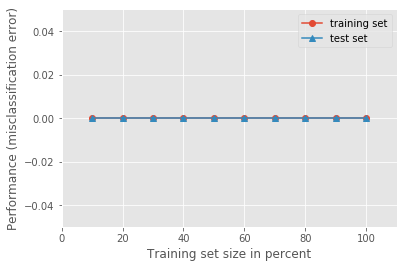

In [97]:
plt.figure()
plot_learning_curves(Xt, Yt, xt, yt, cbc, print_model=False, style='ggplot')
plt.show()

In [75]:
r1 = model_selection.cross_val_score(dtc, Xt, Yt, cv=kf)
print(r1.mean())

0.7801559745740079


In [76]:
r2 = model_selection.cross_val_score(etc, Xt, Yt, cv=kf)
print(r2.mean())

0.9871134020618557


In [77]:
r3 = model_selection.cross_val_score(vc, Xt, Yt, cv=kf)
print(r3.mean())

0.9479247903423962


In [78]:
r4 = model_selection.cross_val_score(abc, Xt, Yt, cv=kf)
print(r4.mean())

1.0


In [79]:
r5 = model_selection.cross_val_score(gbc, Xt, Yt, cv=kf)
print(r5.mean())

1.0


In [80]:
r6 = model_selection.cross_val_score(xgbc, Xt, Yt, cv=kf)
print(r6.mean())

1.0


In [81]:
r7 = model_selection.cross_val_score(cbc, Xt, Yt, cv=kf)
print(r7.mean())

NameError: name 'cbc' is not defined

In [142]:
vc1 = VotingClassifier(estimators=[('DT', dtc), ('ET', etc)], voting='hard')

In [143]:
vc2 = VotingClassifier(estimators=[('ET', etc), ('RF', rfc)], voting='hard')

In [144]:
vc1.fit(Xt, Yt)
vc2.fit(Xt, Yt)

VotingClassifier(estimators=[('ET',
                              ExtraTreesClassifier(bootstrap=False,
                                                   class_weight='balanced',
                                                   criterion='entropy',
                                                   max_depth=8, max_features=4,
                                                   max_leaf_nodes=10,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=50,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=10, n_jobs=None,
                                                   oob_score=False,
                                                   random_state=None, 

In [145]:
vc1.score(xt,yt)

0.9721362229102167

In [146]:
vc2.score(xt,yt)

0.9860681114551083

In [87]:
from sklearn import metrics

In [98]:
yp1 = dtc.predict(xt)
yp2 = rfc.predict(xt)
yp3 = etc.predict(xt)
yp4 = vc.predict(xt)
yp5 = bc.predict(xt)
yp6 = abc.predict(xt)
yp7 = gbc.predict(xt)
yp8 = xgbc.predict(xt)
yp9 = cbc.predict(xt)
yp10 = vc1.predict(xt)
yp11 = vc2.predict(xt)

#### Accuracy scores of the models above

In [99]:
acc1 = metrics.accuracy_score(yt, yp1)

In [100]:
acc2 =  metrics.accuracy_score(yt, yp2)
acc3 =  metrics.accuracy_score(yt, yp3)
acc4 =  metrics.accuracy_score(yt, yp4)
acc5 =  metrics.accuracy_score(yt, yp5)
acc6 =  metrics.accuracy_score(yt, yp6)
acc7 =  metrics.accuracy_score(yt, yp7)
acc8 =  metrics.accuracy_score(yt, yp8)
acc9 =  metrics.accuracy_score(yt, yp9)
acc10=  metrics.accuracy_score(yt, yp10)
acc11=  metrics.accuracy_score(yt, yp11)

In [101]:
print(acc1)
print(acc2)
print(acc3)
print(acc4)
print(acc5)
print(acc6)

0.7786377708978328
1.0
1.0
0.9814241486068112
0.7430340557275542
1.0


In [102]:
print(acc7)
print(acc8)
print(acc9)
print(acc10)
print(acc11)

1.0
1.0
1.0
0.9814241486068112
1.0


In [103]:
print(metrics.confusion_matrix(yt, yp1))

[[469 131]
 [ 12  34]]


C:\Users\HP RYZEN 3\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function plot_confusion_matrix is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_confusion_matrix instead.
  warnings.warn(msg, category=DeprecationWarning)


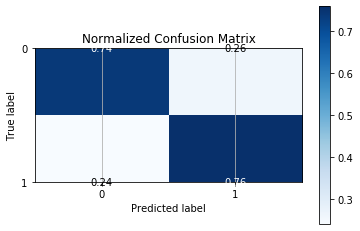

In [119]:
import scikitplot.plotters as skplt
skplt.plot_confusion_matrix(yt, yp5, normalize=True)
plt.show()

#### Precision scores of the models above

In [104]:
p1 = metrics.precision_score(yt, yp1)
p2 = metrics.precision_score(yt, yp2)
p3 = metrics.precision_score(yt, yp3)
p4 = metrics.precision_score(yt, yp4)
p5 = metrics.precision_score(yt, yp5)
p6 = metrics.precision_score(yt, yp6)
p7 = metrics.precision_score(yt, yp7)
p8 = metrics.precision_score(yt, yp8)
p9 = metrics.precision_score(yt, yp9)
p10 = metrics.precision_score(yt, yp10)
p11 = metrics.precision_score(yt, yp11)


In [105]:
print(p1,p2,p3,p4,p4,p5,p6,p7,p8,p9,p10,p11)

0.20606060606060606 1.0 1.0 1.0 1.0 0.18421052631578946 1.0 1.0 1.0 1.0 1.0 1.0


### recall scores 

In [106]:
r1 = metrics.recall_score(yt,yp1)
r2 = metrics.recall_score(yt,yp2)
r3 = metrics.recall_score(yt,yp3)
r4 = metrics.recall_score(yt,yp4)
r5 = metrics.recall_score(yt,yp5)
r6 = metrics.recall_score(yt,yp6)
r7 = metrics.recall_score(yt,yp7)
r8 = metrics.recall_score(yt,yp8)
r9 = metrics.recall_score(yt,yp9)
r10 = metrics.recall_score(yt,yp10)
r11 = metrics.recall_score(yt,yp11)


In [107]:
print(r1,r2,r3,r4,r5,r6,r7,r8,r9,r10,r11)

0.7391304347826086 1.0 1.0 0.7391304347826086 0.7608695652173914 1.0 1.0 1.0 1.0 0.7391304347826086 1.0


#### f1 score

In [108]:
fs1 = metrics.f1_score(yt, yp1)
fs2 = metrics.f1_score(yt, yp2)
fs3 = metrics.f1_score(yt, yp3)
fs4 = metrics.f1_score(yt, yp4)
fs5 = metrics.f1_score(yt, yp5)
fs6 = metrics.f1_score(yt, yp6)
fs7 = metrics.f1_score(yt, yp7)
fs8 = metrics.f1_score(yt, yp8)
fs9 = metrics.f1_score(yt, yp9)
fs10 = metrics.f1_score(yt, yp10)
fs11 = metrics.f1_score(yt, yp11)


In [109]:
print(fs1,fs2,fs3,fs4,fs5,fs6,fs7,fs8,fs9,fs10,fs11)

0.3222748815165877 1.0 1.0 0.85 0.2966101694915254 1.0 1.0 1.0 1.0 0.85 1.0


### ROC AUC SCORE

In [111]:
ras1 = metrics.roc_auc_score(yt, yp1)
ras2 = metrics.roc_auc_score(yt, yp2)
ras3 = metrics.roc_auc_score(yt, yp3)
ras4 = metrics.roc_auc_score(yt, yp4)
ras5 = metrics.roc_auc_score(yt, yp5)
ras6 = metrics.roc_auc_score(yt, yp6)
ras7 = metrics.roc_auc_score(yt, yp7)
ras8 = metrics.roc_auc_score(yt, yp8)
ras9 = metrics.roc_auc_score(yt, yp9)
ras10 = metrics.roc_auc_score(yt, yp10)
ras11 = metrics.roc_auc_score(yt, yp11)


In [112]:
print(ras1, ras2, ras3, ras4, ras5, ras6, ras7, ras8, ras9, ras10, ras11)

0.7603985507246377 1.0 1.0 0.8695652173913043 0.7512681159420291 1.0 1.0 1.0 1.0 0.8695652173913043 1.0


In [113]:
print(metrics.classification_report(yt, yp1))

              precision    recall  f1-score   support

           0       0.98      0.78      0.87       600
           1       0.21      0.74      0.32        46

    accuracy                           0.78       646
   macro avg       0.59      0.76      0.59       646
weighted avg       0.92      0.78      0.83       646



In [130]:
lol =  pd.DataFrame(data = range(len(xt)), columns = ["index"])

In [131]:
f['class'].value_counts()

0    2414
1     170
Name: class, dtype: int64

In [114]:
bc1 = BaggingClassifier(base_estimator=rfc, n_estimators=10, random_state=10)
bc2 = BaggingClassifier(base_estimator=etc, n_estimators=10, random_state=10)

In [115]:
bc1.fit(xt,yt)

BaggingClassifier(base_estimator=RandomForestClassifier(bootstrap=True,
                                                        class_weight='balanced',
                                                        criterion='entropy',
                                                        max_depth=3,
                                                        max_features=4,
                                                        max_leaf_nodes=15,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=50,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        n_estimators=10,
                                                        n_jobs=None,
        

In [116]:
bc2.fit(xt,yt)

BaggingClassifier(base_estimator=ExtraTreesClassifier(bootstrap=False,
                                                      class_weight='balanced',
                                                      criterion='entropy',
                                                      max_depth=8,
                                                      max_features=4,
                                                      max_leaf_nodes=10,
                                                      min_impurity_decrease=0.0,
                                                      min_impurity_split=None,
                                                      min_samples_leaf=50,
                                                      min_samples_split=2,
                                                      min_weight_fraction_leaf=0.0,
                                                      n_estimators=10,
                                                      n_jobs=None,
                                 

In [117]:
yp12 = bc1.predict(xt)
yp13 = bc2.predict(xt)

In [118]:
acc12 = bc1.score(xt,yt)
yacc12= metrics.accuracy_score(yt, yp12)
yps12 = metrics.precision_score(yt, yp12)
r12 = metrics.recall_score(yt, yp12)
f12 = metrics.f1_score(yt , yp12)

In [119]:
acc13 = bc2.score(xt,yt)
yacc13= metrics.accuracy_score(yt, yp13)
yps13 = metrics.precision_score(yt, yp13)
r13 = metrics.recall_score(yt, yp13)
f13 = metrics.f1_score(yt , yp13)

In [120]:
print(acc12, yacc12, yps12, r12, f12)

0.7631578947368421 0.7631578947368421 0.1977401129943503 0.7608695652173914 0.3139013452914798


In [121]:
ras12 = metrics.roc_auc_score(yt, yp12)

In [122]:
print(acc13, yacc13, yps13, r13, f13)

0.6253869969040248 0.6253869969040248 0.1524822695035461 0.9347826086956522 0.2621951219512195


In [123]:
ras13 = metrics.roc_auc_score(yt, yp13)

In [124]:
xauc = [acc1, acc2, acc3, acc4, acc5, acc6, acc7, acc8, acc9, acc10, acc11, acc12, acc13]
xps = [p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,yps12,yps13]
xrs = [r1,r2,r3,r4,r5,r6,r7,r8,r9,r10,r11,r12,r13]
xf = [fs1,fs2,fs3,fs4,fs5,fs6,fs7,fs8,fs9,fs10,fs11,f12,f13]
xra = [ras1,ras2,ras3,ras4,ras5,ras6,ras7,ras8,ras9,ras10,ras11,ras12,ras13]

In [145]:
import seaborn as sns

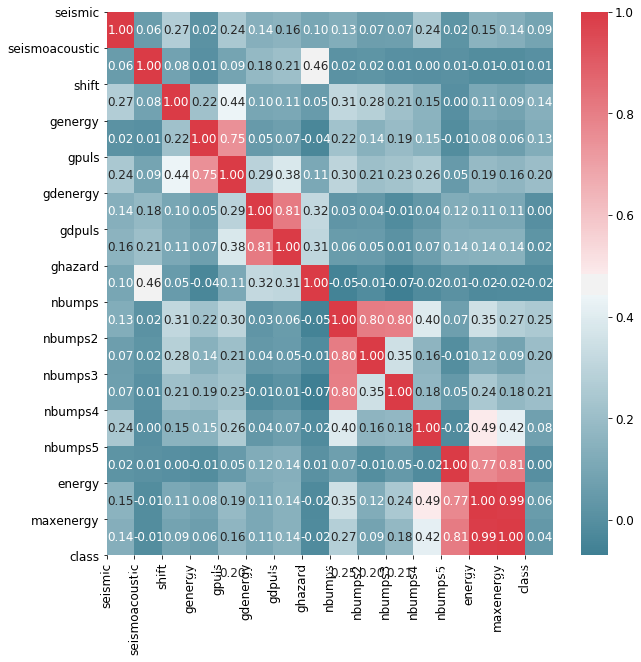

In [147]:
corr = newdata.corr()
fig, ax = plt.subplots(figsize=(10, 10))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
plt.xticks(range(len(corr.columns)), corr.columns)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

In [148]:
mirror = False

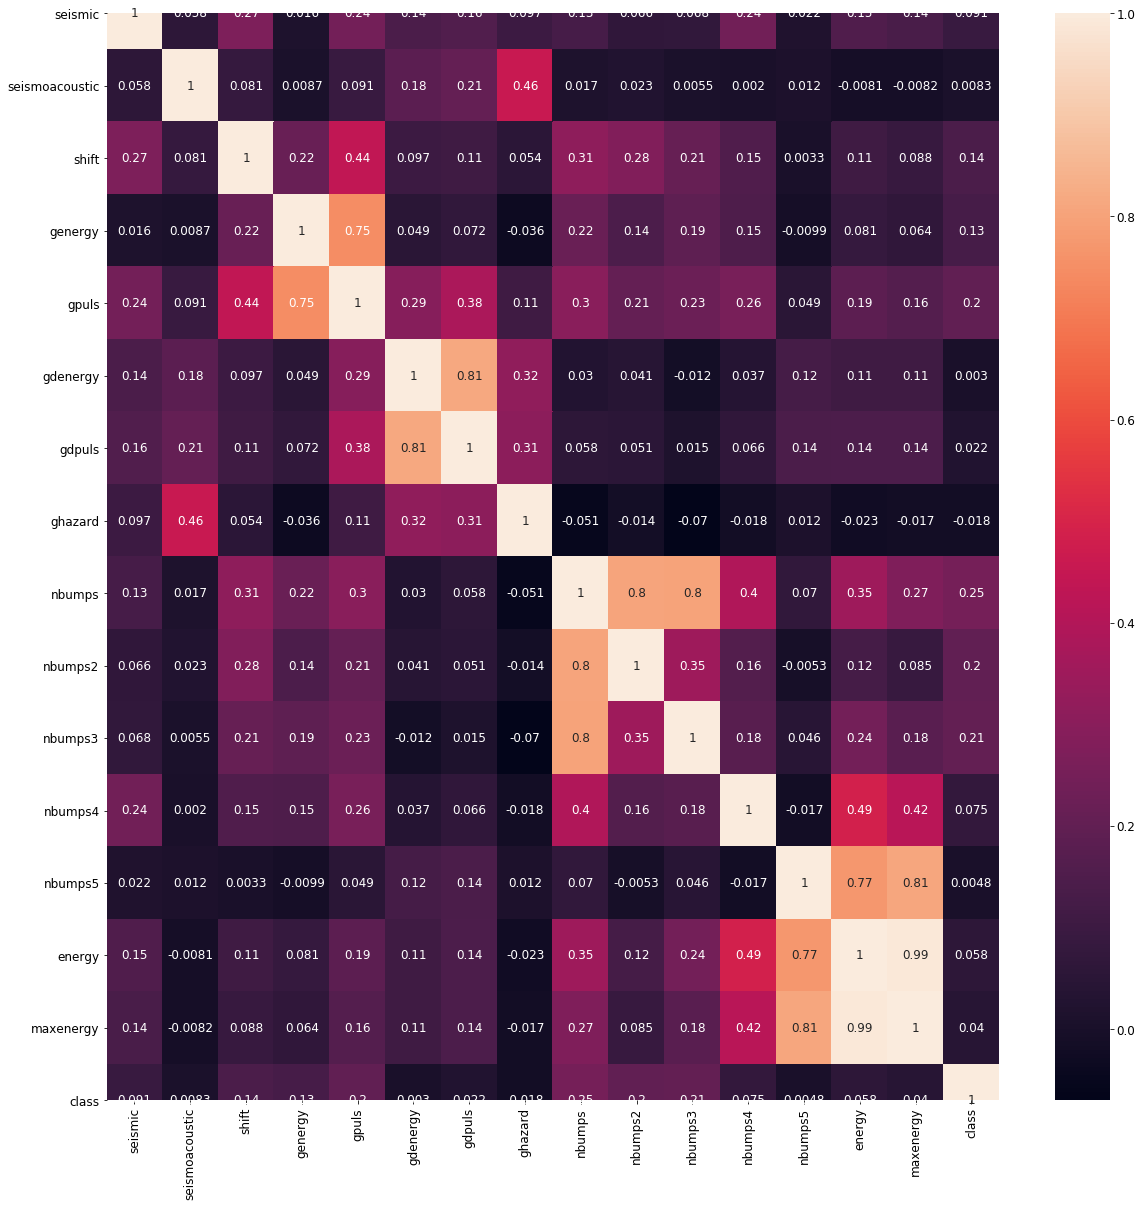

In [149]:
plt.figure(figsize=(20,20))
sns.heatmap(newdata.corr(), annot=True)


In [150]:
f['seismic'].value_counts()

0    1682
1     902
Name: seismic, dtype: int64

In [151]:
f['seismoacoustic'].value_counts()

0    1580
1     956
2      48
Name: seismoacoustic, dtype: int64

In [152]:
f['shift'].value_counts()

1    1663
0     921
Name: shift, dtype: int64

In [153]:
f['ghazard'].value_counts()

0    2342
1     212
2      30
Name: ghazard, dtype: int64

In [154]:
f['class'].value_counts()

0    2414
1     170
Name: class, dtype: int64

In [155]:
file = arff.loadarff(open('seismic-bumps.arff'))
check = pd.DataFrame(file[0])

In [156]:
check['seismic'].value_counts()

b'a'    1682
b'b'     902
Name: seismic, dtype: int64

In [157]:
check['seismoacoustic'].value_counts()

b'a'    1580
b'b'     956
b'c'      48
Name: seismoacoustic, dtype: int64

In [158]:
check['ghazard'].value_counts()

b'a'    2342
b'b'     212
b'c'      30
Name: ghazard, dtype: int64

In [159]:
check['shift'].value_counts()

b'W'    1663
b'N'     921
Name: shift, dtype: int64

In [160]:
check['class'].value_counts()

b'0'    2414
b'1'     170
Name: class, dtype: int64

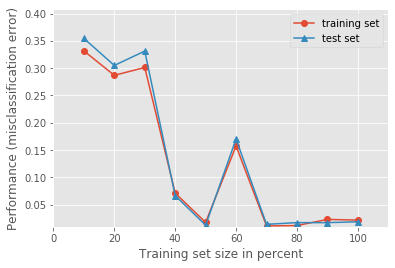

In [161]:
plt.figure()
plot_learning_curves(Xt, Yt, xt, yt, vc1, print_model= False, style='ggplot')
plt.show()

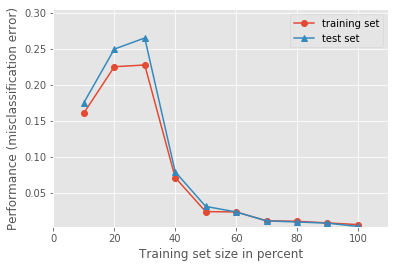

In [162]:
plt.figure()
plot_learning_curves(Xt, Yt, xt, yt, vc2, print_model= False, style='ggplot')
plt.show()

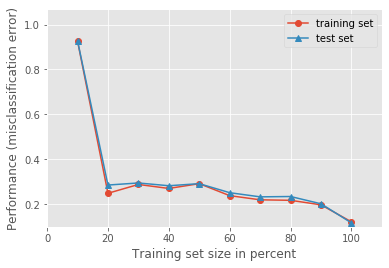

In [163]:
plt.figure()
plot_learning_curves(Xt, Yt, xt, yt, bc1, print_model= False, style='ggplot')
plt.show()

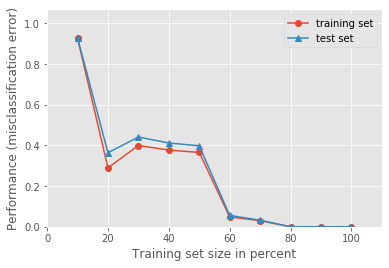

In [164]:
plt.figure()
plot_learning_curves(Xt, Yt, xt, yt, bc2, print_model= False, style='ggplot')
plt.show()

In [127]:
from yellowbrick.classifier import ClassificationReport

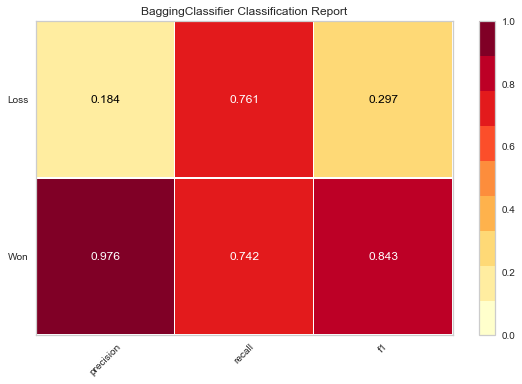

In [155]:
visualizer1 = ClassificationReport(bc, classes=['Won','Loss'])
visualizer1.fit(Xt, Yt) 
visualizer1.score(xt, yt) 
g = visualizer1.poof()